# Adventures in mosaic density!

Let's see what happens to optimal filters (à la Atick and Redlich) when we change the density of the mosaic.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib 
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline

import seaborn as sns
import scipy.optimize as opt
import scipy.signal as ssig
from scipy.interpolate import interp1d
from scipy.special import softmax
import scipy

def softplus(x, beta=1): return np.log1p(np.exp(-np.abs(beta * x)))/beta + np.maximum(x, 0)

plt.rcParams.update({
    "text.usetex": True,
})

sns.set_context('talk')

%config InlineBackend.figure_format = 'retina'

np.random.seed(12346)

# First, let's set up some problem dimensions:

In [2]:
L = 10  # linear size of space in one dimension
T = 5 # size of time
N = 1001 # number of points
M = 1001
zz = np.linspace(-L/2, L/2, N)
tt = np.linspace(-T/2, T/2, M)
dz = zz[1] - zz[0]
dt = tt[1] - tt[0]

# Now assuming $C_x = \frac{A}{k^\alpha\omega^2}$, let's calculate the Atick and Redlich filter.

In [3]:
sigin = 1
sigout = 1.25
#A = np.array([100])
A = np.array([100,10,1])
alpha = 1.3

def soft_bandpass(lo, hi, freqs, stiffness=10):
    if lo <= 0:
        return scipy.special.expit(stiffness * (hi - freqs))
    else:
        return scipy.special.expit(stiffness * (freqs - lo)) * scipy.special.expit(stiffness * (hi - freqs))

#Original version of the code
def C_prev(k, o):
    return A/(np.abs(k)**alpha * np.abs(o)**2)

def C(k,o,i):
    eigval = A[i]/(np.abs(k)**alpha * np.abs(o)**2)  
    return eigval

In [4]:
k = np.array([1.0,2.0,7.0,8.0,10.0])
k /= np.sum(k**2)**0.5
np.sum((k*2**0.5)**2)

2.0

In [5]:
k_logrange = np.logspace(-3, 11, 100)
o_logrange = np.logspace(-3, 11, 100)

In [21]:
def filter(A, sigin, sigout, nu, k_lims=None, o_lims=None):
    def v_opt(k, omega, i):
        sqrt_piece = np.sqrt(1 + (4/nu) * (sigin**2/sigout**2) * k**alpha * omega**2/A[i])
        v2 = 0.5 * (sqrt_piece + 1) * A[i] / (A[i] + sigin**2 * k**alpha * omega**2) - 1
        v2 = np.sqrt(np.maximum(v2, 0) * sigout**2/sigin**2)
        
        if k_lims:
            unit_cell_k = soft_bandpass(k_lims[0], k_lims[1], k)
            v2 *= unit_cell_k
        if o_lims:
            unit_cell_o = soft_bandpass(o_lims[0], o_lims[1], omega)
            v2 *= unit_cell_o
        #print(v2.shape)
            
        return v2
    return v_opt

And redefine functions so that the filter can be bandwidth-constrained:

In [22]:
freqs_k = scipy.fft.fftfreq(N, d=dz) * np.pi
freqs_omega = scipy.fft.fftfreq(M, d=dt) * np.pi

freqs_k_small = freqs_k[(freqs_k > 0)]
freqs_omega_small = freqs_omega[(freqs_omega > 0)]

oo, kk = np.meshgrid(freqs_omega_small, freqs_k_small)

In [23]:
nu = 1e-3
vfun = filter(A, sigin, sigout, nu)

In [ ]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline
#matplotlib.use("TkAgg")
for i in range(A.shape[0]):
    v = vfun(kk, oo, i)
    Ck = C(kk, oo, i)
    plt.figure()
    plt.contour(np.log(oo), np.log(kk), np.log10(v), levels=11)
    plt.title(r"Optimal filter $|v(k, \omega)|$")
    plt.ylabel(r"$\log k$")
    plt.xlabel(r"$\log \omega$");
plt.show()

# Power as a function of $\nu$

In [ ]:
def filter_power(nu, omega0, k_lims, i):
    vfun = filter(A, sigin, sigout, nu)
    func = lambda k: k * (vfun(k, omega0,i)**2) * (C(k, omega0, i) + sigin**2)/(2 * np.pi)**2
    return scipy.integrate.quad(func, k_lims[0], k_lims[1])[0]

def filter_power_log_k(nu, omega0, log_k_lims):
    """Integrate power in psi = log k space."""
    vfun = filter(A, sigin, sigout, nu)
    func = lambda psi: np.exp(2 * psi) * vfun(np.exp(psi), omega0**2) * (C(np.exp(psi), omega0) + sigin**2)/(2 * np.pi)**2
    return scipy.integrate.quad(func, log_k_lims[0], log_k_lims[1])[0]

In [ ]:
%%time
nu_list = np.logspace(-10, 0, 50) #[1e-6 , 1e-5, 1e-4, 0.005, 0.01, 0.05]

k_lims = (1e-3, 1e3)
omega0 = 10**1.2
pow_list = [filter_power(nu, omega0, k_lims, 0) for nu in nu_list]

# Bringing it all together

(100,)
()
()
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
()
()
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
()
()
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


/tmp/ipykernel_1280491/2398821666.py:16: RuntimeWarning: divide by zero encountered in log10
  ax[0, 0].plot(np.log10(k_logrange), np.log10(v2), color='k')
/tmp/ipykernel_1280491/2398821666.py:27: RuntimeWarning: divide by zero encountered in log10
  ax[0, 0].fill_between(np.log10(k_logrange[right_side]), np.log10(v2[right_side]), -11, color='orange', alpha=0.5, edgecolor='none')
/tmp/ipykernel_1280491/2398821666.py:54: RuntimeWarning: divide by zero encountered in log10
  ax[0, 1].plot(np.log10(k_logrange), 10 * np.log10(power), label=np.around(np.log10(log_o), 1), color=cmap[idx])
/tmp/ipykernel_1280491/2398821666.py:69: RuntimeWarning: divide by zero encountered in log10
  ax[1, 1].plot(np.log10(pow_list), np.log10(nu_list), color='k')


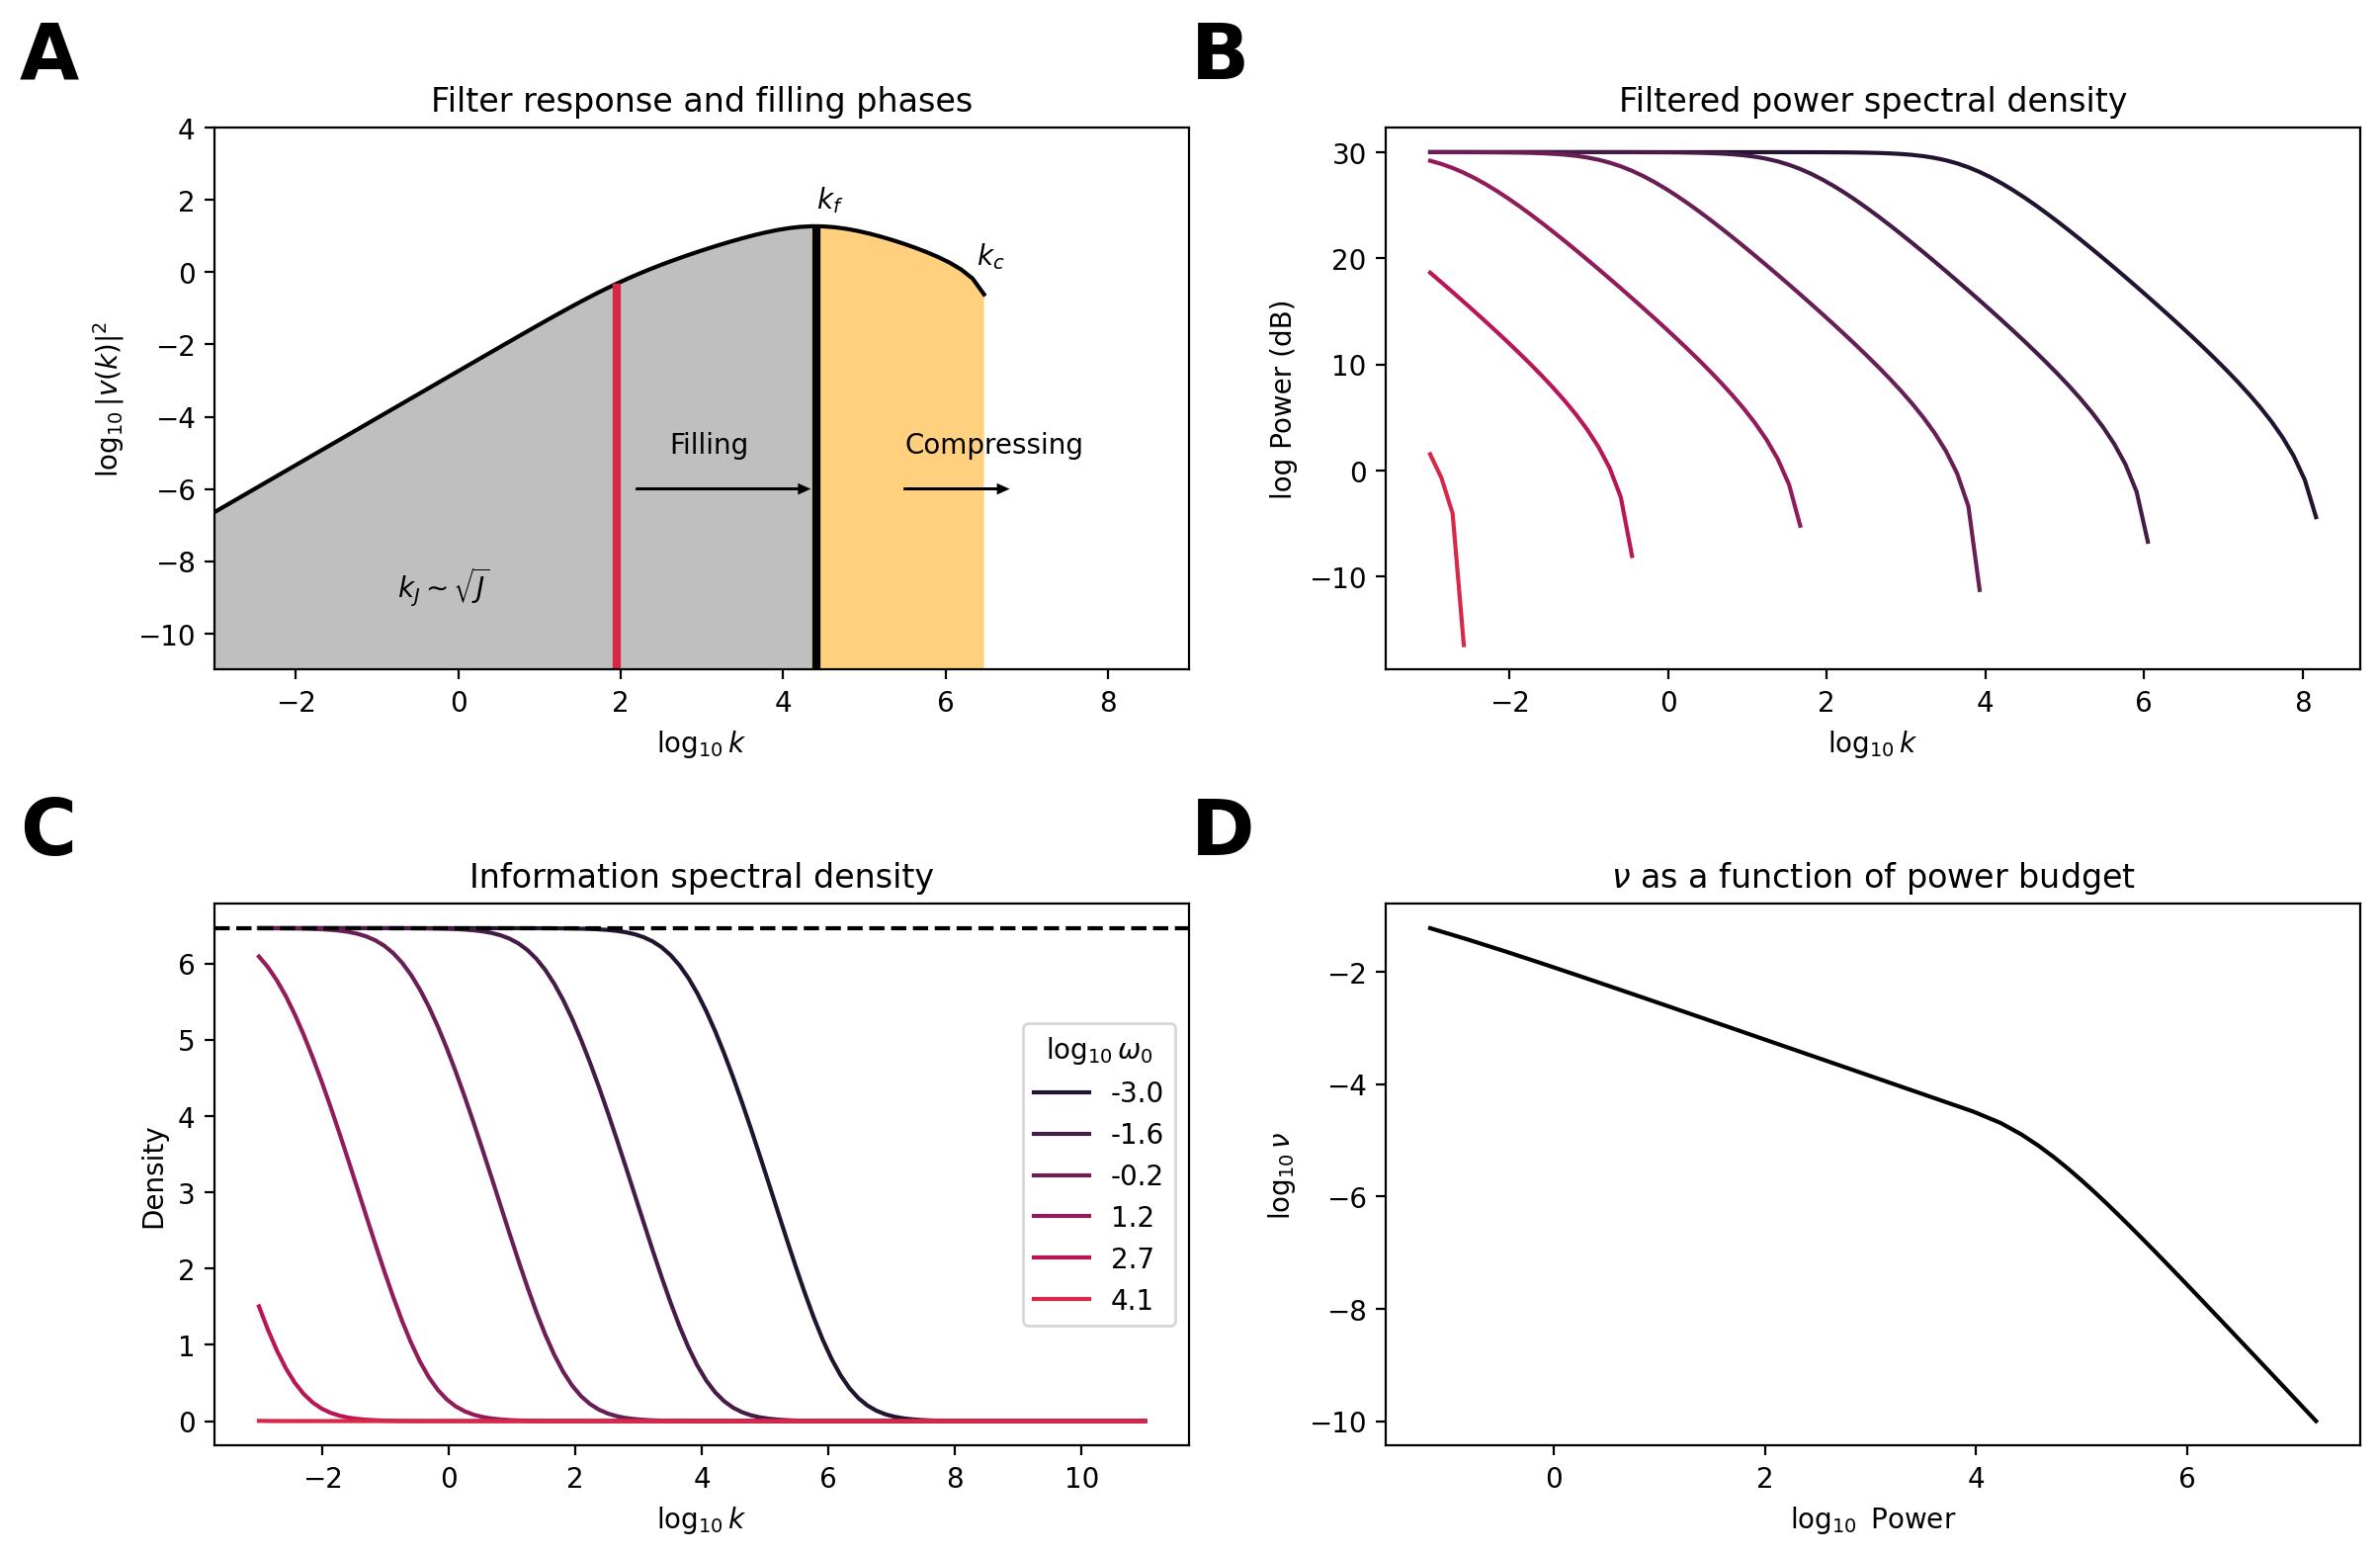

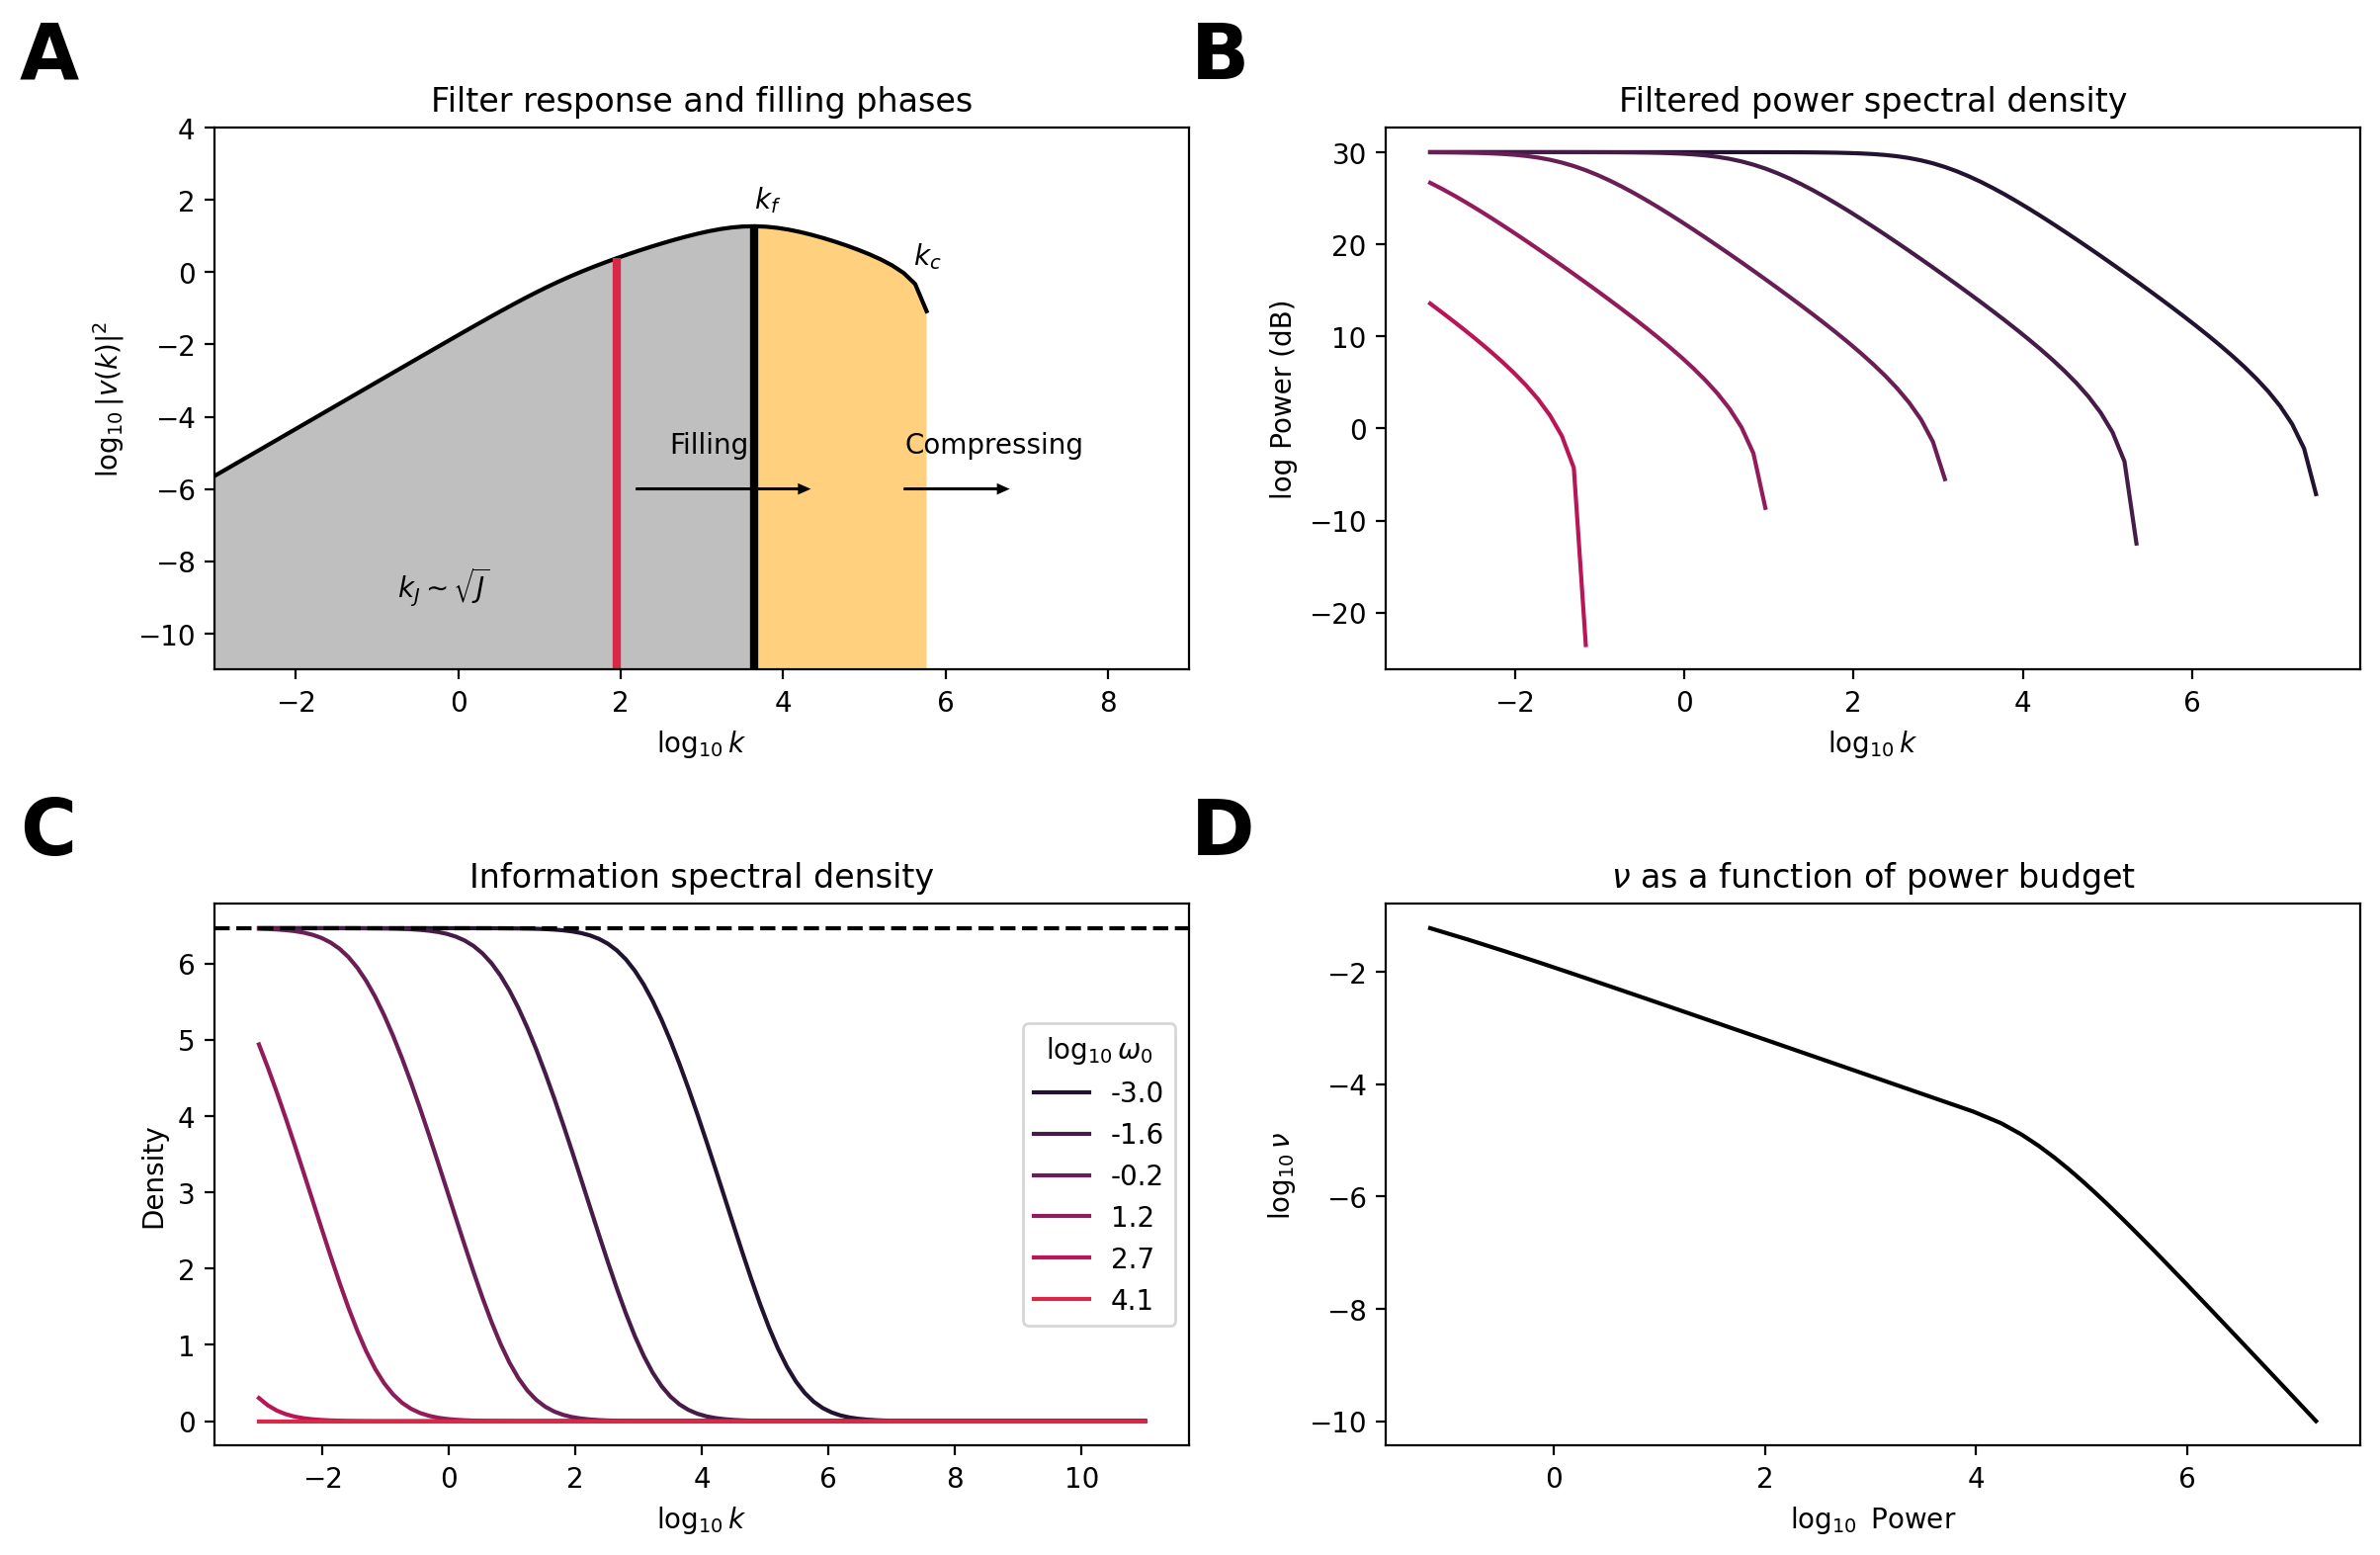

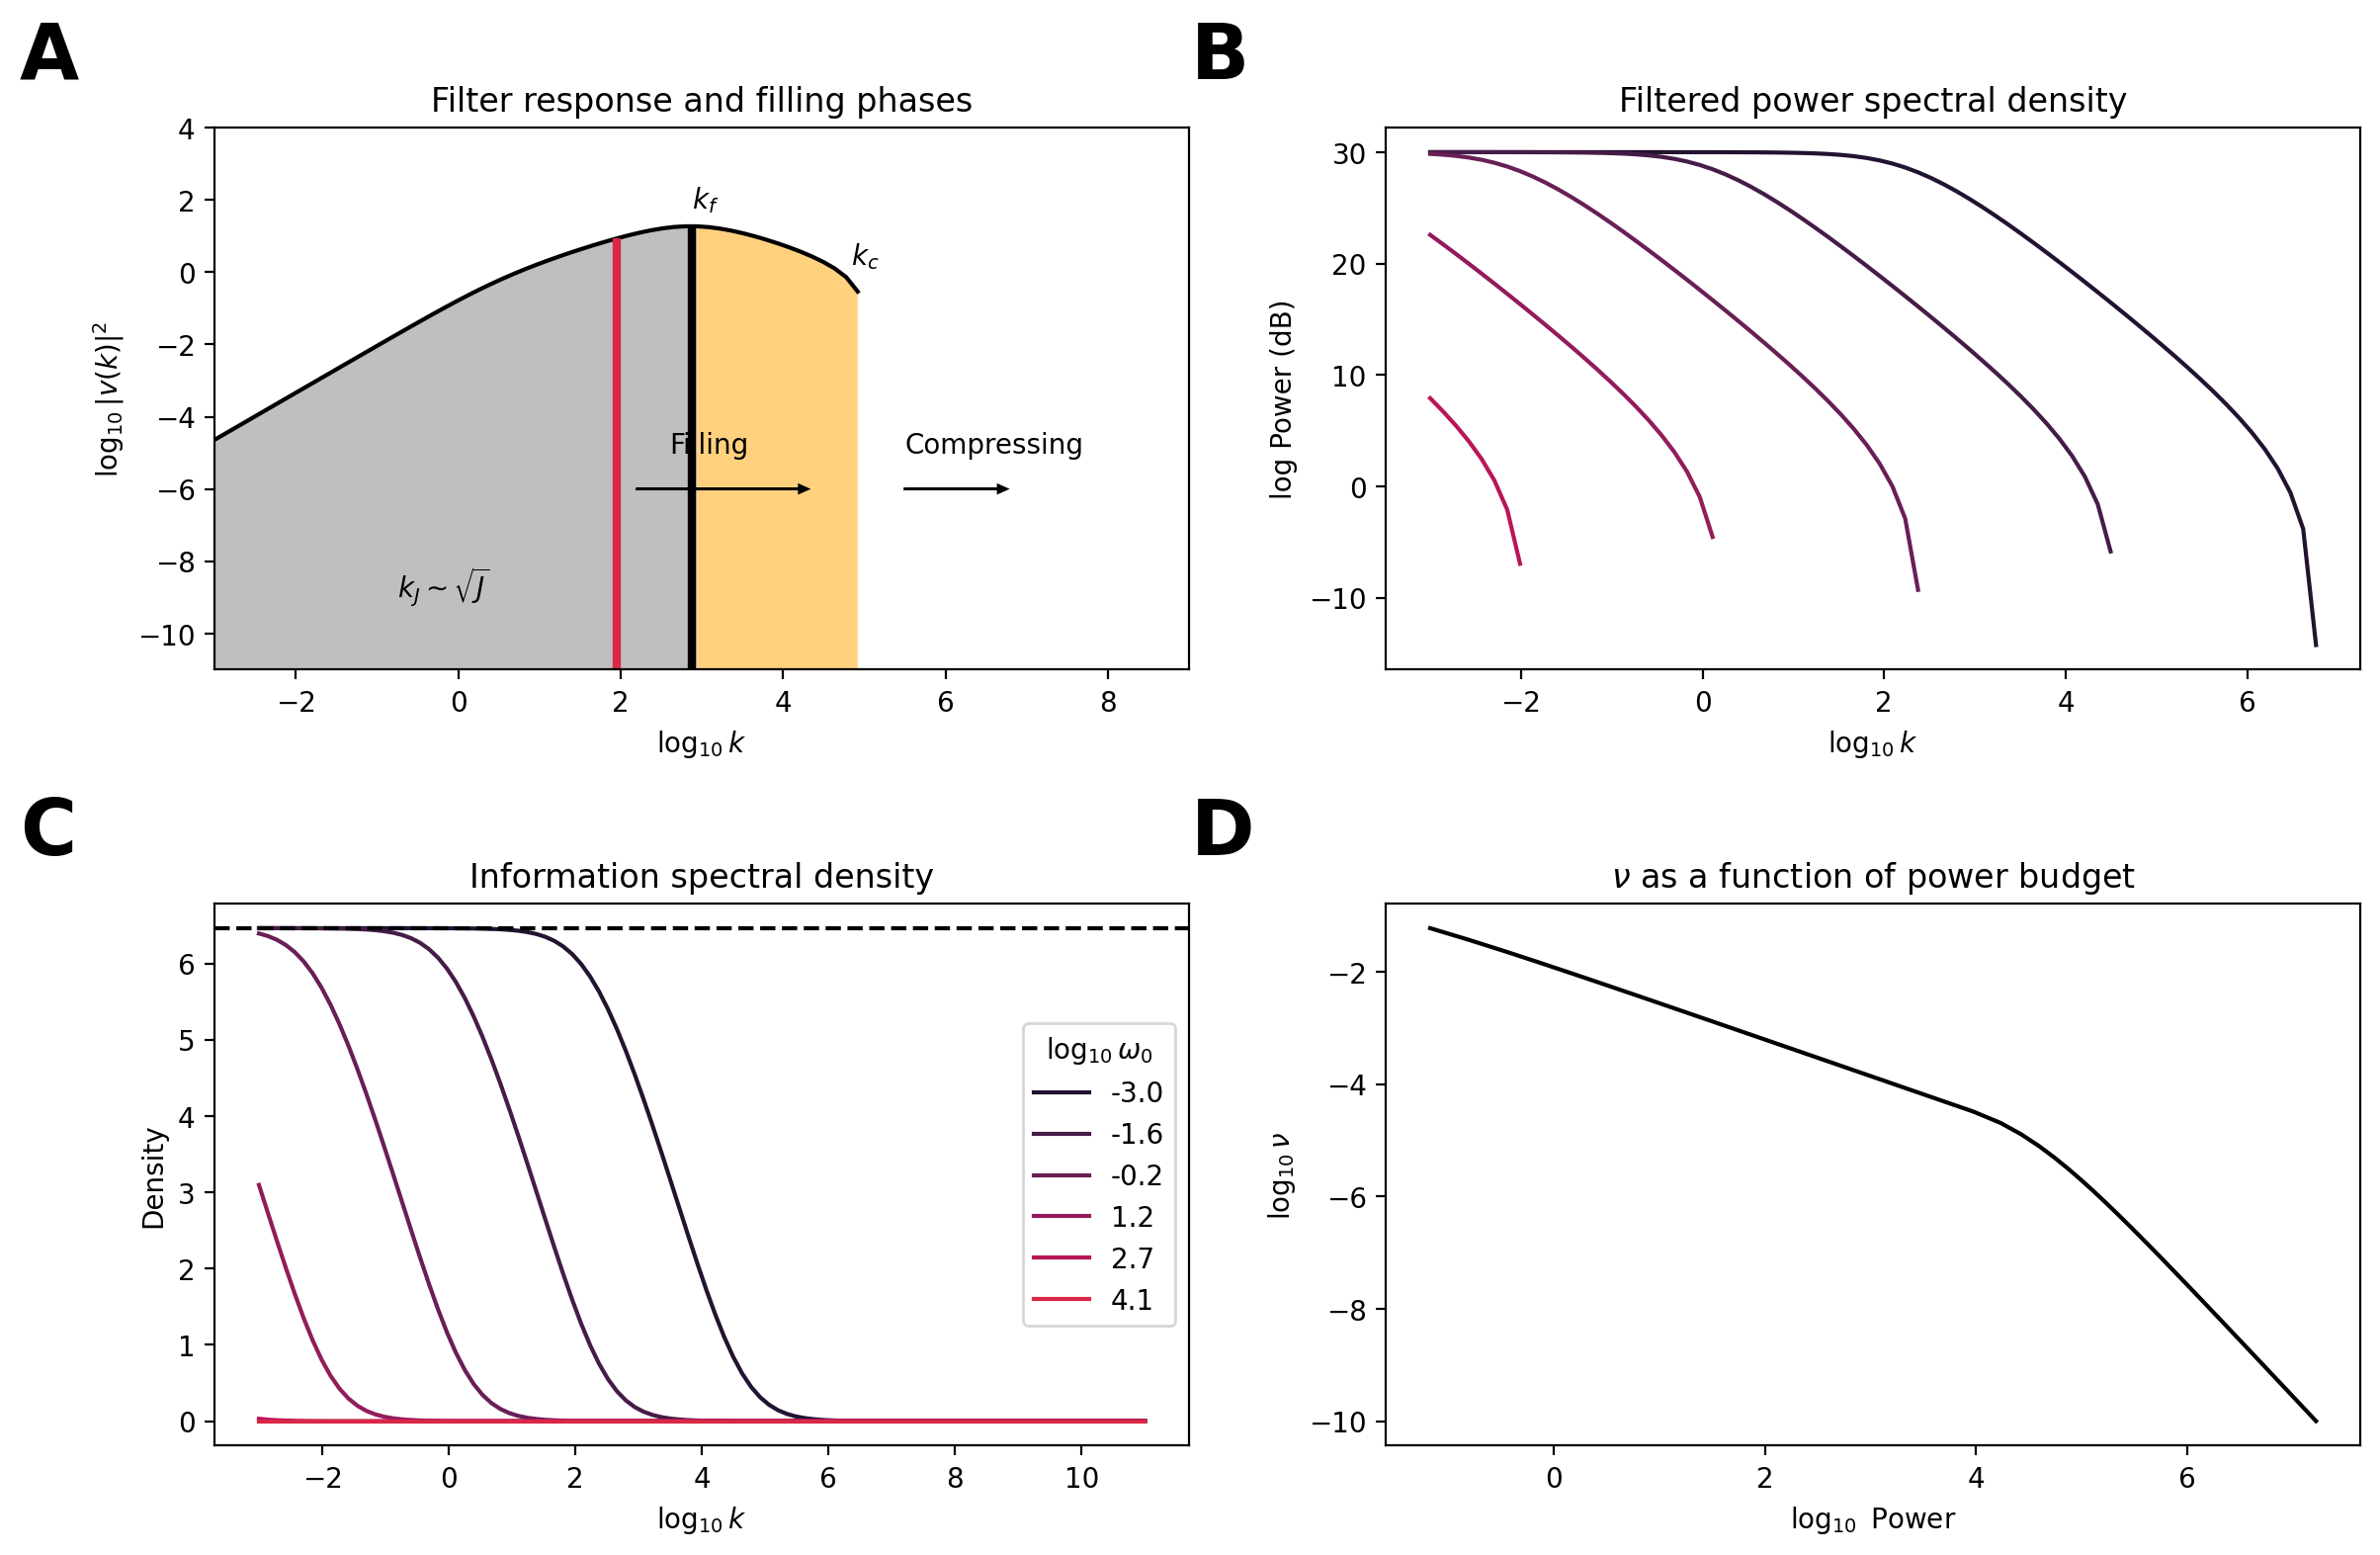

In [12]:

for i in range(A.shape[0]):
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))
    cmap = sns.color_palette('rocket', 10)
    label_loc = (-0.2, 1.2)
    fontsize=28
    fontweight='heavy'
    
    k_logrange = np.logspace(-3, 11, 100)
    o_logrange = np.logspace(-3, 11, 100)
    
    idx = 8



    v2 = vfun(k_logrange, o_logrange[idx], i)**2
    ax[0, 0].plot(np.log10(k_logrange), np.log10(v2), color='k')
    log_kp = (np.log10(A[i]) - 2 * np.log10(sigin) - 2 * np.log10(o_logrange[idx]))/alpha
    log_v2_kp = 2 * np.log10(vfun(10**log_kp, o_logrange[idx], i))
    log_kc = log_kp - (np.log10(nu) + 2 * np.log(sigout))/alpha
    log_v2_kc = 2 * np.log10(vfun(10**log_kc, o_logrange[idx], i))
    
    ax[0, 0].vlines(log_kp, -11, log_v2_kp, color='k', linewidth=3)
    nearest_idx = np.argmin(np.abs(k_logrange - 10**log_kp))
    left_side = slice(0, nearest_idx + 1) #k_logrange[:nearest_idx] <= 10**log_kp
    right_side = slice(nearest_idx, -1) #k_logrange[nearest_idx:] >= 10**log_kp
    ax[0, 0].fill_between(np.log10(k_logrange[left_side]), np.log10(v2[left_side]), -11, color='gray', alpha=0.5, edgecolor='none')
    ax[0, 0].fill_between(np.log10(k_logrange[right_side]), np.log10(v2[right_side]), -11, color='orange', alpha=0.5, edgecolor='none')
    ax[0, 0].set_xlim(-3, 9)
    ax[0, 0].set_ylim(-11, 4)
    ax[0, 0].annotate(r"Filling", (2.6, -5))
    ax[0, 0].arrow(2.2, -6, 2, 0, head_width=0.2, head_length=0.1, color='k')
    lower_idx, upper_idx = 35, 70
    linecolor = cmap[5] #(227/255, 74/255, 51/255)
    ax[0, 0].vlines(np.log10(k_logrange[lower_idx]), -11, np.log10(v2[lower_idx]), color=linecolor, linewidth=3, zorder=2)
    # ax[0, 0].vlines(np.log10(k_logrange[upper_idx]), -3.55, np.log10(v2[upper_idx]), color=linecolor, linewidth=3, zorder=1)
    # ax[0, 0].vlines(np.log10(k_logrange[upper_idx]), -11, -5.8, color=linecolor, linewidth=3, zorder=1)
    ax[0, 0].annotate(r"$k_J \sim \sqrt{J}$", (np.log10(k_logrange[lower_idx]) - 2.7, -9))
    ax[0, 0].annotate(r"Compressing", (5.5, -5))
    # ax[0, 0].annotate(r"$\frac{\pi}{\Delta z(J)}$", (np.log10(k_logrange[upper_idx]) + .5, -9))
    ax[0, 0].arrow(5.5, -6, 1.15, 0, head_width=0.2, head_length=0.1, color='k')
    ax[0, 0].annotate(r"$k_f$", (log_kp, log_v2_kp + 0.5))
    ax[0, 0].annotate(r"$k_c$", (log_kc, log_v2_kc + 0.5))
    ax[0, 0].set_title(r"Filter response and filling phases")
    ax[0, 0].set_xlabel(r"$\log_{10} k$")
    ax[0, 0].set_ylabel(r"$\log_{10} |v(k)|^2$");
    ax[0, 0].text(*label_loc, "A", transform=ax[0, 0].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    
    
    for idx, log_o in enumerate(o_logrange[:60:10]):
        numer = vfun(k_logrange, log_o, i)**2 * (C(k_logrange, log_o, i) + sigin**2) + sigout**2
        denom = vfun(k_logrange, log_o, i)**2 * (sigin**2) + sigout**2
        power = vfun(k_logrange, log_o, i)**2 * (C(k_logrange, log_o, i) + sigin**2)
        v2 = vfun(k_logrange, log_o, i)**2
        ax[0, 1].plot(np.log10(k_logrange), 10 * np.log10(power), label=np.around(np.log10(log_o), 1), color=cmap[idx])
        ax[1, 0].plot(np.log10(k_logrange), np.log(numer) - np.log(denom), label=np.around(np.log10(log_o), 1), color=cmap[idx])
    
    ax[0, 1].set_xlabel(r"$\log_{10} k$")
    ax[0, 1].set_ylabel(r"log Power (dB)");
    ax[0, 1].set_title(r"Filtered power spectral density");
    ax[0, 1].text(*label_loc, "B", transform=ax[0, 1].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    
    ax[1, 0].axhline(-np.log(nu) - np.log(sigout**2), color='k', linestyle='--')
    ax[1, 0].set_xlabel(r"$\log_{10} k$")
    ax[1, 0].set_ylabel(r"Density")
    ax[1, 0].set_title(r"Information spectral density")
    ax[1, 0].legend(title=r"$\log_{10} \omega_0$")
    ax[1, 0].text(*label_loc, "C", transform=ax[1, 0].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    
    ax[1, 1].plot(np.log10(pow_list), np.log10(nu_list), color='k')
    ax[1, 1].set_xlabel(r"$\log_{10}$ Power")
    ax[1, 1].set_ylabel(r"$\log_{10} \nu$")
    ax[1, 1].set_title(r"$\nu$ as a function of power budget")
    ax[1, 1].text(*label_loc, "D", transform=ax[1, 1].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    
    
    plt.tight_layout()
plt.show()
#plt.savefig("figures/k_scaling.pdf")

# Optimal $\nu$ and information as a function of $\omega$:

In [13]:
omega0 = 10**1.2
k = (2 * np.pi/L) * np.array([[0, 0], [1, 0], [1, 0]])
nu = 1e-4

def make_k(J):
    """k is J x 2, with J the number of neurons/frequencies"""
    M = int(np.sqrt(J))  # find biggest square array that fits inside
    m1, m2 = np.meshgrid(range(M), range(M))
    mm = np.stack([m1.ravel(), m2.ravel()], axis=1)
    return (2 * np.pi/L) * mm

def filter_power_discrete(nu, omega0, J, i):
    k = make_k(J)
    #print(np.linalg.norm(k,axis=1), "that's what I think is wrong")
    ktilde = np.linalg.norm(k, axis=1)**alpha * sigin**2 * omega0**2/A[i]
    #print(ktilde, "ktilde", omega0, A, np.linalg.norm(k,axis=1))
    Invalid_value = 1+4*ktilde/(nu + sigout**2)
    if np.min(Invalid_value) < 0:
        print("Invalid value", Invalid_value, "nu", nu)
    Pj = np.maximum(0, sigout**2 /(2 * (ktilde + 1e-16)) * (np.sqrt(1 + 4 * ktilde/(nu * sigout**2)) - 1) - sigout**2)
    return np.sum(Pj)

In [14]:
#I want filter_power_discrete to take 1 nu, but lognu to be an array for scipy.minimize. 
def excess_power(lognus, omega0, J, P):
    power_sum = []
    i = 0
    for lognu in lognus:
        #filter_power = filter_power_discrete(np.exp(lognu), omega0, J)
        #print(filter_power, "filter_power", J, P)
        power =  np.max([filter_power_discrete(np.exp(lognu), omega0, J, i), 1e-32])
        power_sum.append(power)
        i += 1
    power_constraint = np.log(P/np.sum(power_sum))
    #print(power_constraint)
    return power_constraint

def optimal_lognu(omega0, J, P):
    power_constraint = {'type': 'ineq', 'fun': excess_power, 'args': (omega0, J, P)}
    nu_fun = create_information_nu(omega0,J,P)
    
    res = opt.minimize(nu_fun, np.array([-np.log(omega0), -np.log(omega0), -np.log(omega0)]), #bounds=[(1e-16, np.inf)], 
                       constraints=[power_constraint])
    #Original version that only minimizes lognu
    #res = opt.minimize(lambda lognu: lognu, -np.log(omega0), #bounds=[(1e-16, np.inf)], 
    #                   constraints=[power_constraint])
    if res.success:
        #print("Optimal log nu", res.x)
        print("Excess power: ", excess_power(res.x, omega0, J, P))
        return res.x
    else:
        print("Optimizer failed to converge!")
        print(omega0, J, P)
        return None

#Function created by David. Returns information as a function of nu. Will be used in optimal_lognu
def create_information_nu(omega0,J,P):
    def information_nu(log_nu):
        k_local = make_k(J)
        infos = []
        for i in range(A.shape[0]):
            nu_eigenchannel = np.exp(log_nu[i])
            ktilde = np.linalg.norm(k_local, axis=1)**alpha * sigin**2 * omega0**2/A[i]
            #nu_j = np.repeat(nu[np.newaxis], ktilde.shape[0], axis = 0)
            #print(ktilde.shape, nu.shape)
            numer = np.maximum(0, sigout**2 /(2 * (ktilde + 1e-32)) * (np.sqrt(1 + 4 * ktilde/(nu_eigenchannel * sigout**2)) - 1) - sigout**2) + sigout**2
            denom = np.maximum(0, sigout**2 /(2 * (ktilde + 1)) * (np.sqrt(1 + 4 * ktilde/(nu_eigenchannel * sigout**2)) + 1) - sigout**2) + sigout**2
            info = np.sum(np.log(numer) - np.log(denom))
            infos.append(info)
        #print("read here", numer, denom, info)
        return np.sum(infos)*-1
    return information_nu

def plot_information_nu(omega0, J, P):
    log_nus = np.linspace(-5, 1, 200)
    infos = []
    powers = []
    for log_nu in log_nus:
        nu_fun = create_information_nu(omega0,J,P)
        info = nu_fun(log_nu)
        power = np.log(filter_power_discrete(np.exp(log_nu), omega0, J))
        #power = excess_power(np.array([log_nu]), omega0, J, P)
        infos.append(info)
        powers.append(power)
    plt.plot(log_nus, infos)
    plt.xlabel("Log(nu)", size = 40)
    plt.ylabel("Information (nats)")

    plt.figure()
    plt.plot(log_nus, powers)
    plt.xlabel("Log(nu)", size = 40)
    plt.ylabel("Power")
    
def information(omega0, J, P):
    log_nu = optimal_lognu(omega0, J, P)
    nu = np.exp(log_nu)
    
    k = make_k(J)
    infos = []
    for i in range(A.shape[0]):
        ktilde = np.linalg.norm(k, axis=1)**alpha * sigin**2 * omega0**2/A[i]
        
        numer = np.maximum(0, sigout**2 /(2 * (ktilde + 1e-16)) * (np.sqrt(1 + 4 * ktilde/(nu[i] * sigout**2)) - 1) - sigout**2) + sigout**2
        
        denom = np.maximum(0, sigout**2 /(2 * (ktilde + 1)) * (np.sqrt(1 + 4 * ktilde/(nu[i] * sigout**2)) + 1) - sigout**2) + sigout**2
        info = np.sum(np.log(numer) - np.log(denom))
        infos.append(info)
    return np.sum(infos)

In [15]:
#plot_information_nu(omega0,4,6)

## How do we allocate new neurons across mosaics?

Excess power:  3.396804491058395e-08
Excess power:  3.6755043453172885e-12
Excess power:  2.877944323153986e-09
Excess power:  1.0228004391085078e-08
Excess power:  3.283587858773825e-08
Excess power:  6.030183370681176e-08
Excess power:  1.6412623157043163e-07
Excess power:  2.4990202782077755e-07
Excess power:  3.417978340207177e-07
Excess power:  -2.8036484249249795e-10
Excess power:  3.1894153979437926e-10
Excess power:  7.525098319416103e-10
Excess power:  1.7782464388300544e-10
Excess power:  3.5982394835009136e-10
Excess power:  5.291374004222697e-10
Excess power:  4.0180991859016674e-10
Excess power:  3.600661990139774e-10
Excess power:  4.852980238711322e-10
Excess power:  8.927749340961072e-08
Excess power:  2.125388753859321e-11
Excess power:  8.252805102562824e-10
Excess power:  2.2871282619398716e-09
Excess power:  6.466207770527555e-09
Excess power:  2.933971045262691e-08
Excess power:  7.377664488986828e-07
Excess power:  1.3093459648980574e-10
Excess power:  1.454905085

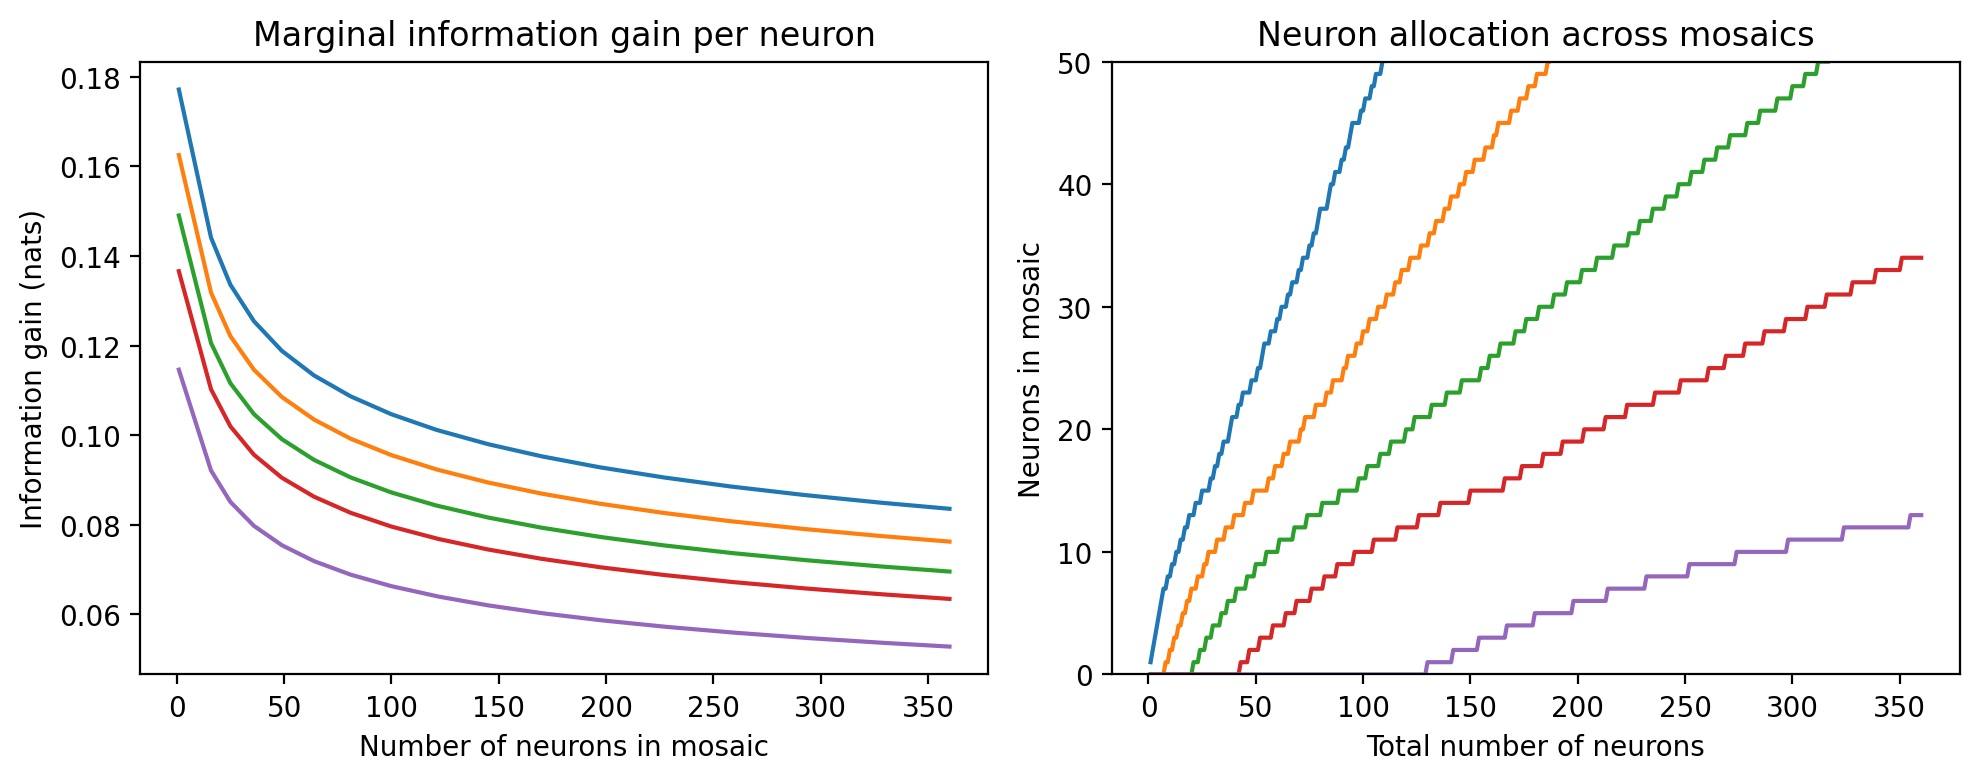

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4)) 

omega0_list = [10**x for x in [1.5, 1.52, 1.54, 1.56, 1.6]]
P0 = 1.5
J_list = [m**2 for m in range(2, 20)]
all_J_list = range(1, J_list[-1])

diff_info_fn_list = []
for omega0 in omega0_list:
    info = [information(omega0, J, J * P0) for J in J_list]
    
    # now interpolate for non-square J
    all_diff_info = interp1d(J_list[1:], np.diff(info), fill_value='extrapolate')
    diff_info_fn_list.append(all_diff_info)
    ax[0].plot(all_J_list, all_diff_info(all_J_list))

ax[0].set_title("Marginal information gain per neuron")
ax[0].set_xlabel("Number of neurons in mosaic")
ax[0].set_ylabel("Information gain (nats)")
    
marginal_allocation = np.zeros((len(all_J_list), len(omega0_list)))
for idx, J in enumerate(all_J_list):
    current_allocation = np.cumsum(marginal_allocation, axis=0)[idx]
    marginal_values = np.array([fun(A + 1) for A, fun in zip(current_allocation, diff_info_fn_list)])
    marginal_allocation[idx, np.argmax(marginal_values)] = 1
    
ax[1].plot(all_J_list, np.cumsum(marginal_allocation, axis=0))
ax[1].set_ylim(0, 50)
ax[1].set_title("Neuron allocation across mosaics")
ax[1].set_xlabel("Total number of neurons")
ax[1].set_ylabel("Neurons in mosaic")

plt.tight_layout()
plt.show()
#plt.savefig("figures/mosaic_allocation.pdf")

# Redefine some things to work in the continuous case

We'll define the filter using some different conventions more applicable in the continuous case.

In [17]:
L = 100  # linear size of space in one dimension
T = 50 # size of time
N = 10001 # number of points
M = 10001
zz = np.linspace(-L/2, L/2, N)
tt = np.linspace(-T/2, T/2, M)
dz = zz[1] - zz[0]
dt = tt[1] - tt[0]

freqs_k = scipy.fft.fftshift(scipy.fft.fftfreq(N, d=dz) * 2 * np.pi)
freqs_omega = scipy.fft.fftshift(scipy.fft.fftfreq(M, d=dt) * 2 * np.pi)
k_low = 0 
o_low = 0 
freqs_k_small = freqs_k[freqs_k > 2 * np.pi * k_low] #[(freqs_k > 0) & (freqs_k < 25)] 
freqs_omega_small = freqs_omega[freqs_omega > 2 * np.pi * o_low] #[(freqs_omega > 0) & (freqs_omega < 25)] 

oo, kk = np.meshgrid(freqs_omega_small, freqs_k_small)

In [18]:
def C(k,o,i):
    eigval = A[i]/(np.abs(k)**alpha * np.abs(o)**2)  
    print("This is eigenvalues shape:", eigval.shape)
    return eigval

def create_information_eps(kf_noA, freqs, power, k_type):
    def information_eps(log_eps):
        infos = []
        for i in range(A.shape[0]):
            eps_eigenchannel = np.exp(log_eps[i])
            if k_type == 'kf':
                Af = A[i]**(1/alpha)
            elif k_type == 'of':
                Af = np.sqrt(A[i])
            kf = kf_noA*Af
            ktilde = np.abs(freqs/kf)**power
            #print("This is the shape of ktilde in information_eps: ", ktilde.shape)
            numer = np.maximum(0, sigout**2 /(2 * (ktilde + 1e-32)) * (np.sqrt(1 + 4 * ktilde/(eps_eigenchannel * sigout**2)) - 1) - sigout**2) + sigout**2
            denom = np.maximum(0, sigout**2 /(2 * (ktilde + 1)) * (np.sqrt(1 + 4 * ktilde/(eps_eigenchannel * sigout**2)) + 1) - sigout**2) + sigout**2
            info = np.sum(np.log(numer) - np.log(denom))
            infos.append(info)
        return np.sum(infos)*-1
    return information_eps
    
def filter_k(kf, eps, k_lims=None, power=alpha):
    def v_opt(k):
        #print("eps:",eps, "k:", k, "kf:", kf, "power:", power)
        sqrt_piece = np.sqrt(1 + (4/eps) * np.abs(k/kf)**power)
        #print("sqrt_piece,", sqrt_piece)
        v2 = 0.5 * (sqrt_piece + 1) / (1 + np.abs(k/kf)**power) - 1
        #print("v2 v1", np.mean(v2))
        v2 = np.sqrt(np.maximum(v2, 0) * sigout**2/sigin**2)
        #print("v2 mean", np.mean(v2), np.abs(k/kf)**power)
        if k_lims:
            unit_cell_k = soft_bandpass(k_lims[0], k_lims[1], k)
            v2 *= unit_cell_k
        
        return v2
    return v_opt

def filter(C, nu, k_lims=None):
    def v_opt(k, o, i):
        CC = np.minimum(C(k, o, i), 1e32)
        sqrt_piece = np.sqrt(CC**2 + (4/nu) * (sigin**2/sigout**2) * CC)
        v2 = 0.5 * (sqrt_piece + CC) / (sigin**2 + CC) - 1
        v2 = np.sqrt(np.maximum(v2, 0) * sigout**2/sigin**2)
        
        if k_lims:
            unit_cell_k = soft_bandpass(k_lims[0], k_lims[1], k)
            v2 *= unit_cell_k
        
        return v2 #- np.min(v2)
    return v_opt

def pad_and_reflect(filter, N, padval=0):
    """
    Zero-pad to length N//2 and reflect about origin to make length N. 
    """
    expanded = np.pad(filter, (0, N//2 + 1 - len(filter)), constant_values=(0, padval))
    return np.concatenate([expanded[::-1], expanded[1:]])

def extrap_and_reflect(filter, N, return_log=False):
    """
    Linearly extrapolate the log filter to better approximate tails and reflect 
    about origin to make length N.
    """
    extrap_fun = interp1d(range(0, len(filter)), np.maximum(-32, np.log(filter)), fill_value='extrapolate')
    expanded = extrap_fun(range(0, N//2 + 1))
    if not return_log:
        expanded = np.exp(expanded)
    return np.concatenate([expanded[::-1], expanded[1:]])

def filter_power(eps, kf, freqs, klims, power):
    vfun = filter_k(kf, eps, klims, power)
    v2 = vfun(freqs)
    Ck = np.abs(freqs/kf)**power
    dk = freqs[1] - freqs[0]
    #print("subset of power", np.sum(v2**2))
    return np.sum(v2**2 * np.abs(freqs) * (Ck + sigin**2) * dk)/(2 * np.pi)**2

def excess_power(log_eps, kf_noA, freqs, klims, power, P, A_type):
    total_power = 0
    for i in range(A.shape[0]):
        #print(kf_noA*(A[i]**(1/alpha)))
        if A_type == 'kf':
            Af = A[i]**(1/alpha)
        elif A_type == 'of':
            Af = np.sqrt(A[i])
        eig_power = filter_power(10**log_eps[i], kf_noA*Af, freqs, klims, power)
        total_power += eig_power
        #print("eig_power", eig_power)
        #print("loss", P-total_power)
    return P - total_power

def optimal_logeps(kf_noA, freqs, klims, power, P, A_type):
    power_constraint = {'type': 'ineq', 'fun': excess_power, 'args': (kf_noA, freqs, klims, power, P, A_type)}
    eps_fun = create_information_eps(kf_noA, freqs, power, A_type)
    res = opt.minimize(eps_fun, np.array([-2,-2,-2]), bounds=[(-16, np.inf)], constraints=[power_constraint])
    if res.success:
        print("Excess power: ", excess_power(res.x, kf_noA, freqs, klims, power, P, A_type))
        return res.x
    else:
        print("Optimizer failed to converge!")
        return None

This is eigenvalues shape: (5000, 5000)
This is eigenvalues shape: (5000, 5000)
This is eigenvalues shape: (5000, 5000)


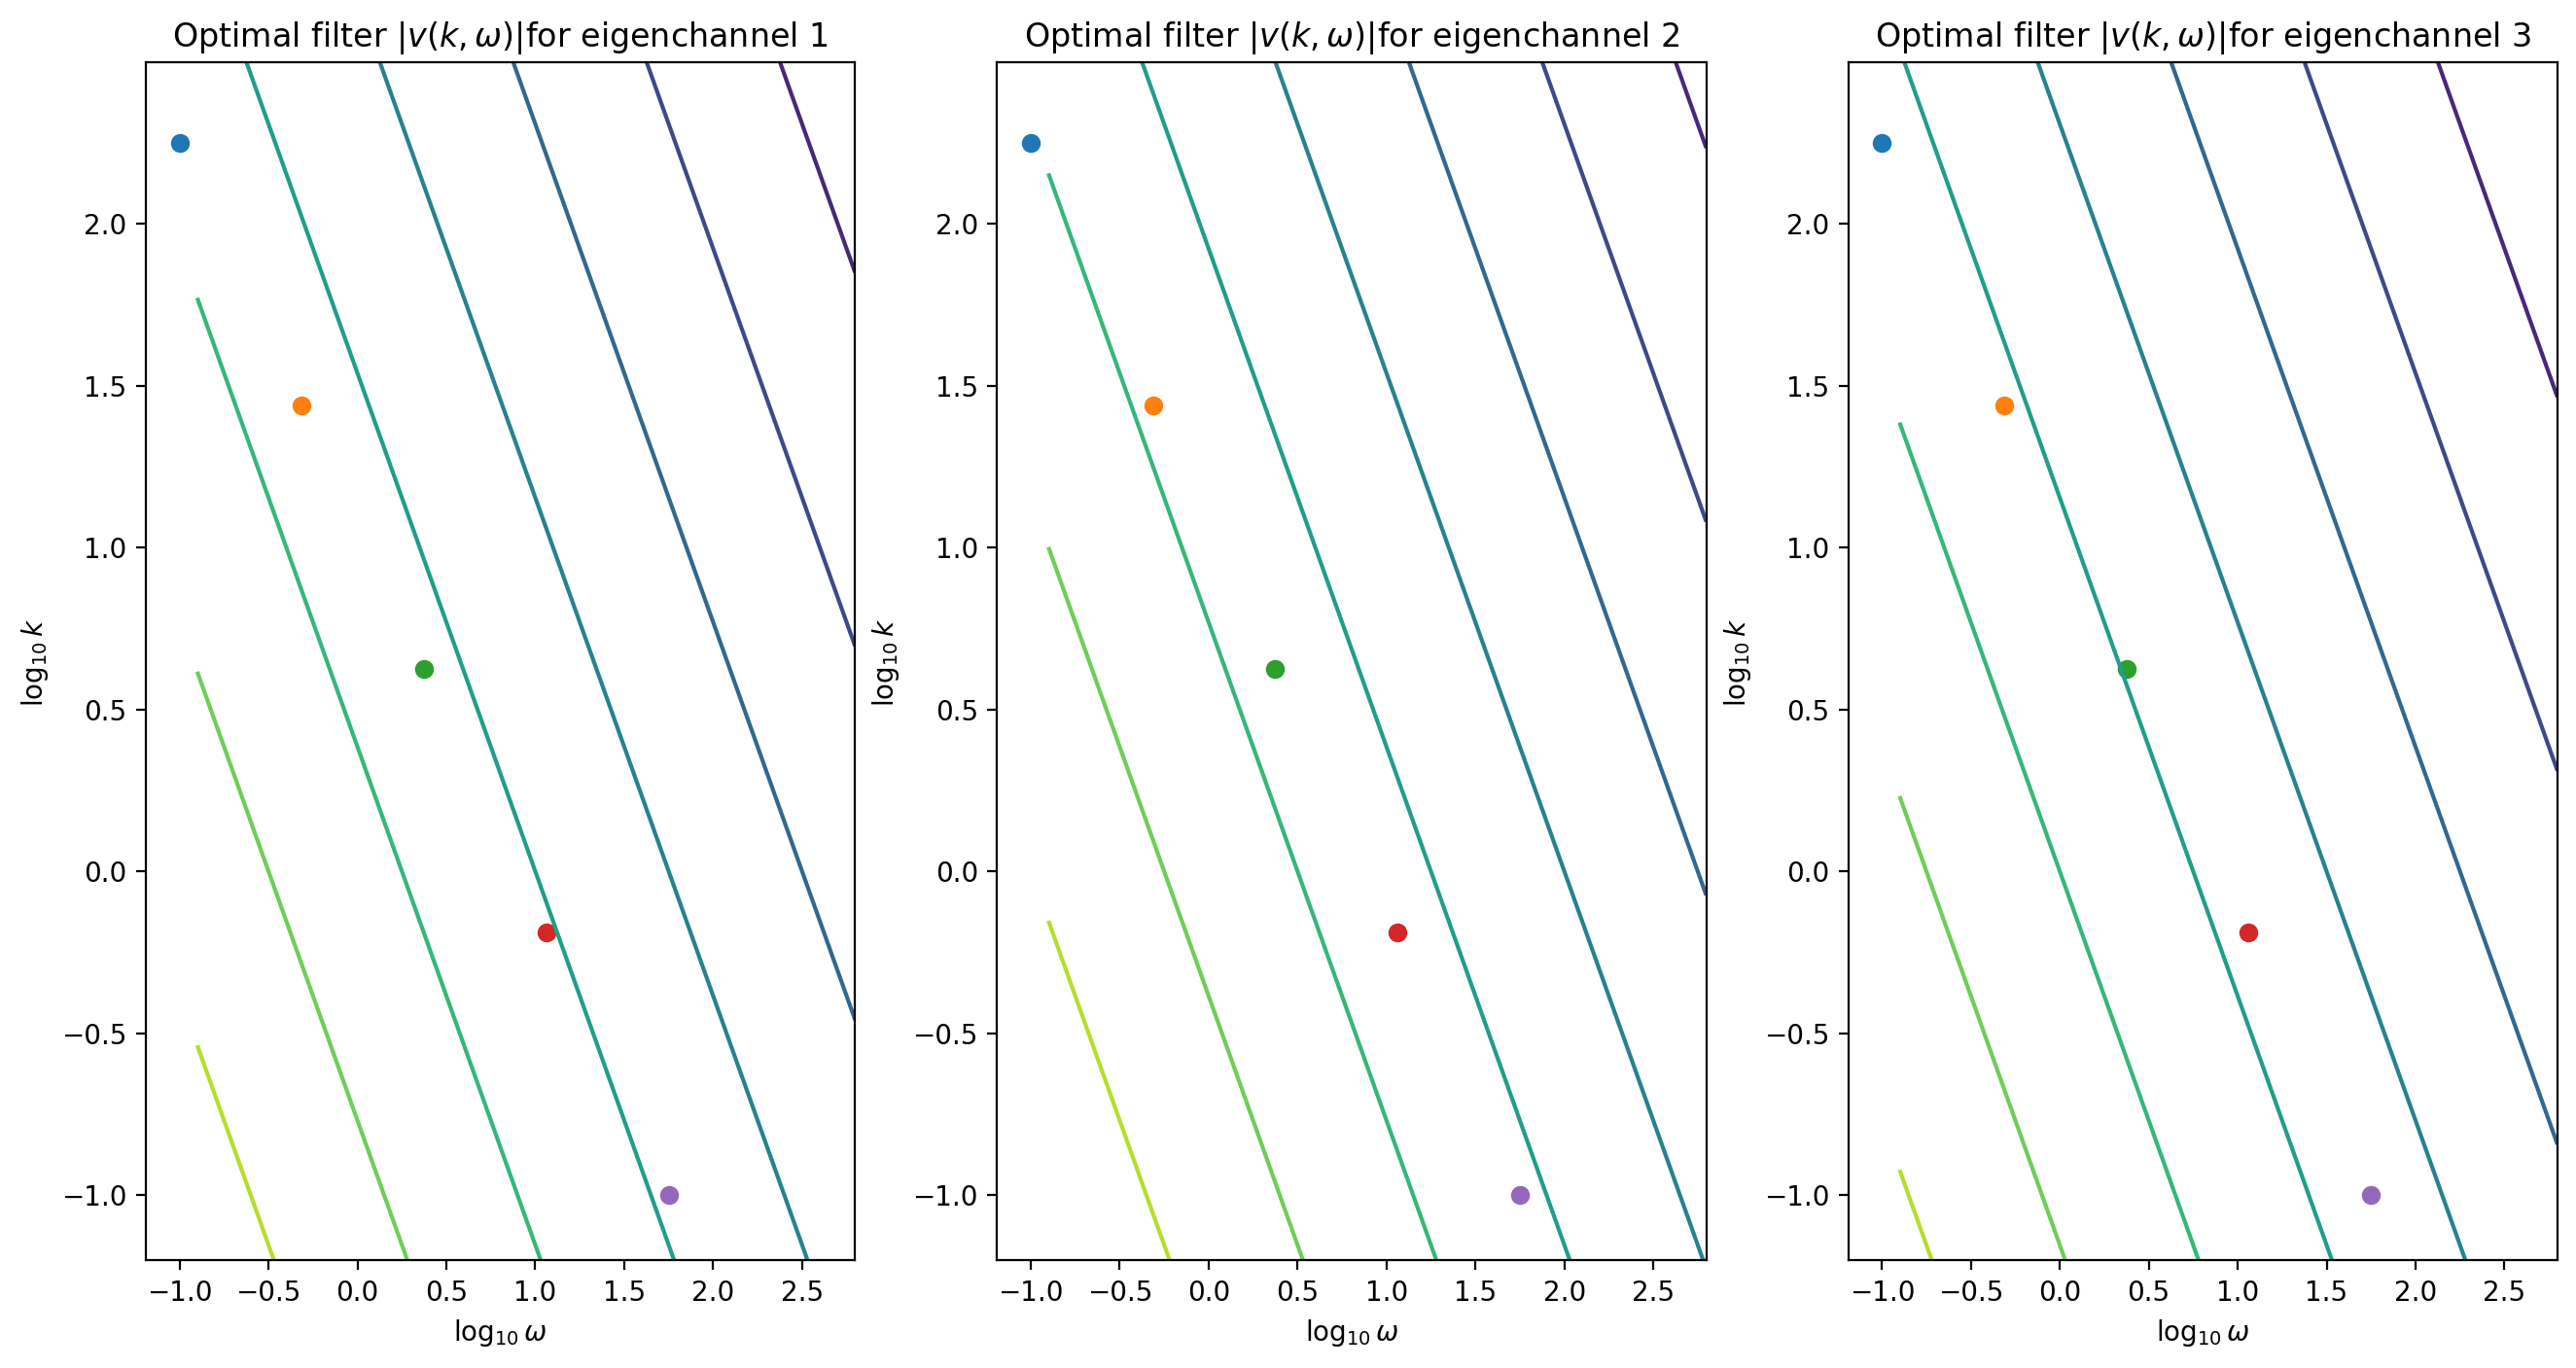

In [19]:
#Bug 1: needed to multiply kf by A**(1/alpha) instead of just A
omega_range_mul = 4
k_range_mul = 1
A = np.array([100,10,1])
if A.shape[0] > 1:
    n_plots = A.shape[0]
else: 
    n_plots = 2
fig, ax = plt.subplots(1, n_plots, figsize=(16, 8))
k0_list = [10**k0 for k0 in np.linspace(2.25*k_range_mul, -1*k_range_mul, 5)]
o0_list = [10**o0 for o0 in np.linspace(-0.25*omega_range_mul, 1.75, 5)]

kf_list_noA = [(sigin**2/o0**2)**(1/alpha) for o0 in o0_list]
of_list_noA = [np.sqrt(sigin**2/k0**alpha) for k0 in k0_list]

for i in range(A.shape[0]):
    vfun = filter(C, 1e-4)
    Ck = C(kk, oo, i)
    ax[i].contour(np.log10(oo), np.log10(kk), np.log10(Ck), levels=10)
    ax[i].set_title(r"Optimal filter $|v(k, \omega)|$" + "for eigenchannel " + str(i+1))
    ax[i].set_ylabel(r"$\log_{10} k$")
    ax[i].set_xlabel(r"$\log_{10} \omega$");
    #ax[i].text(*label_loc, r'\textbf{A}', transform=ax[i].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    
    for kf_noA, of_noA in zip(kf_list_noA, of_list_noA):
        kf = kf_noA*A[i]**(1/alpha)
        of = of_noA*np.sqrt(A[i])
        o0 = np.sqrt(A[i]/sigin**2/kf**alpha)
        k0 = (A[i]/sigin**2/of**2)**(1/alpha)
        ax[i].scatter(np.log10(o0), np.log10(k0))
plt.show()

Text(0, 0.5, 'Filter power')

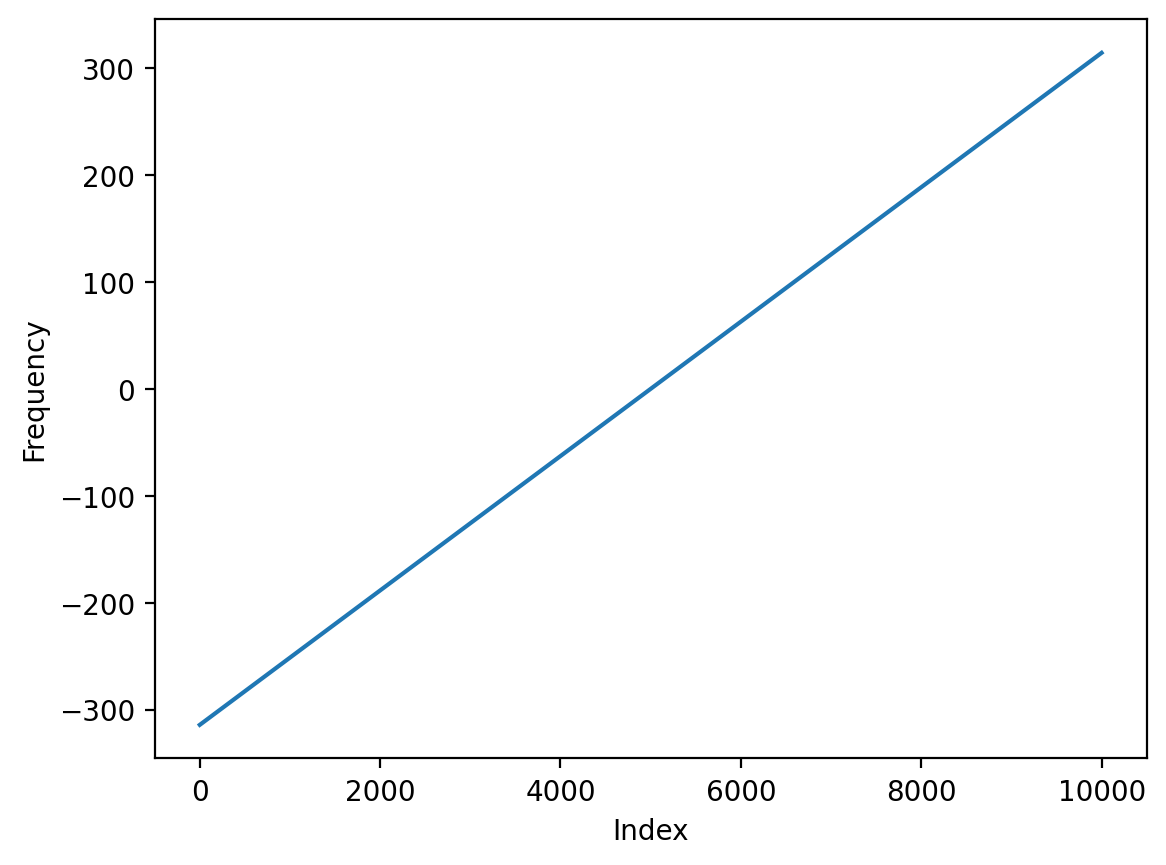

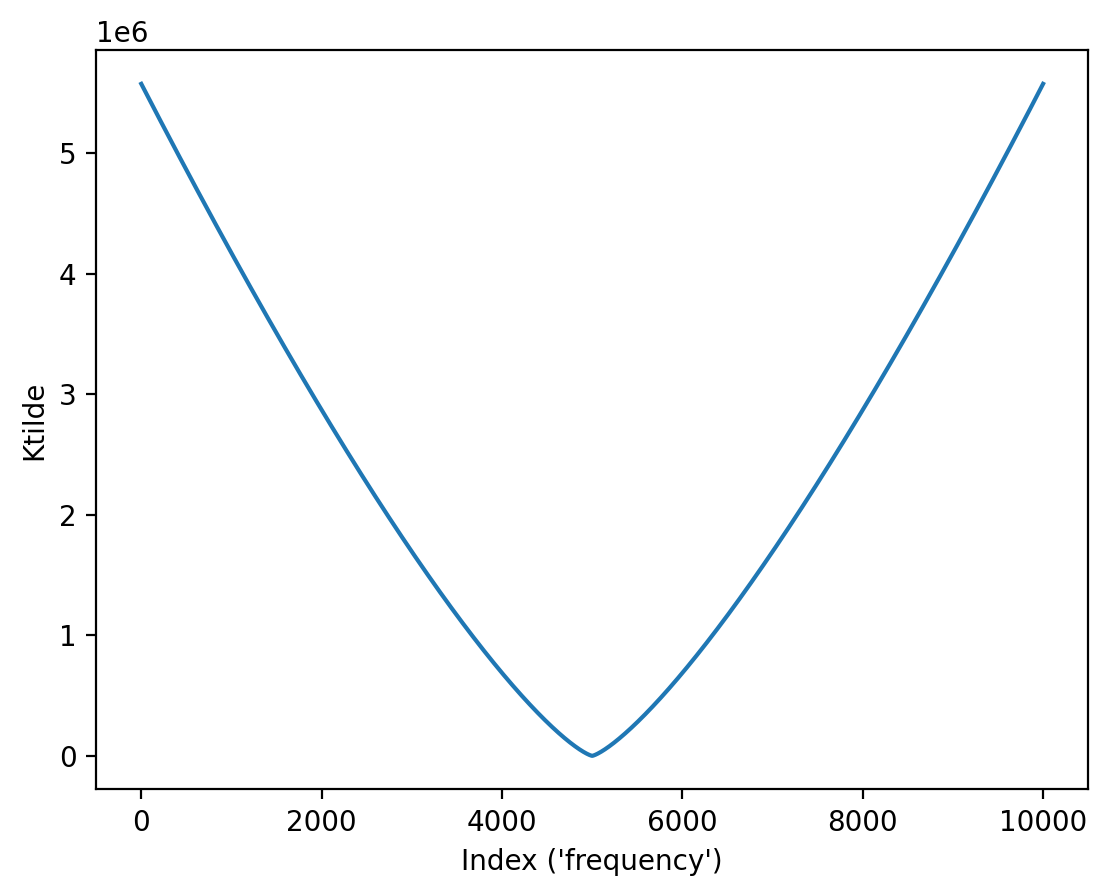

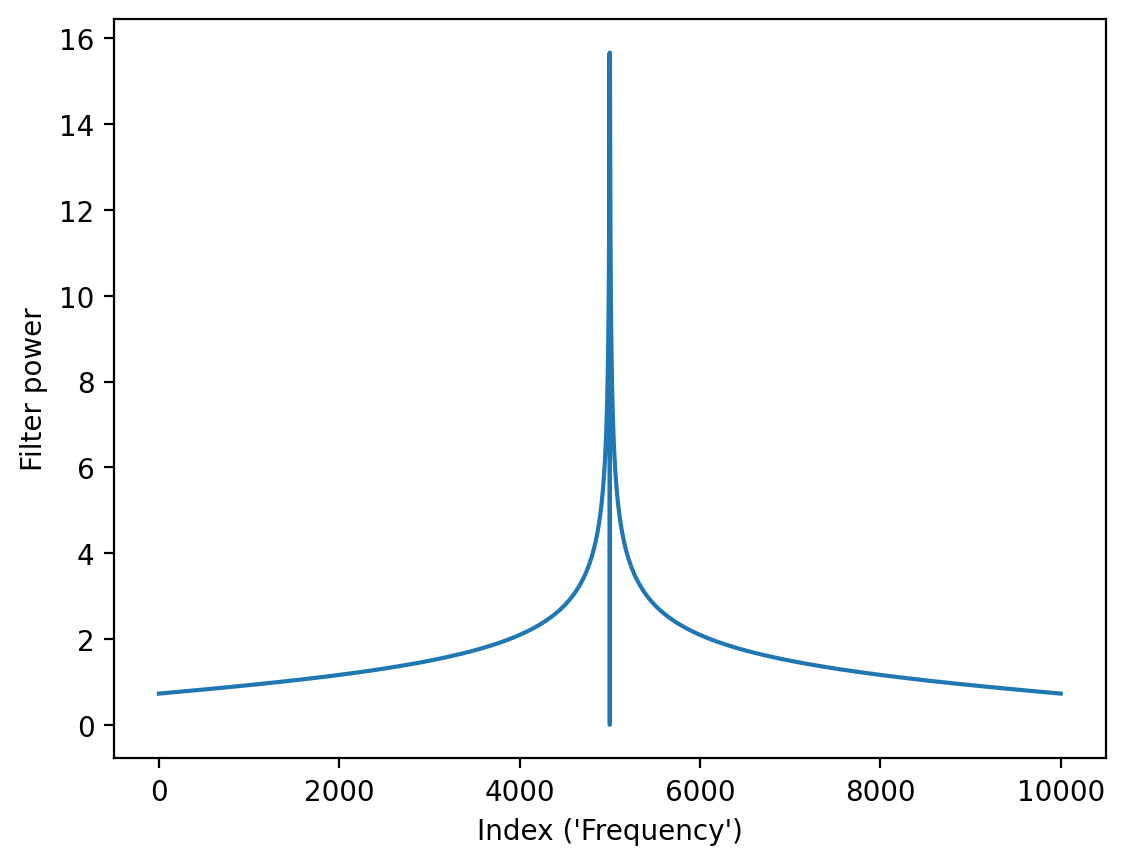

In [22]:
plt.plot(freqs_k)
plt.xlabel("Index")
plt.ylabel("Frequency")
plt.figure()
kf = kf_noA*A**(1/alpha)
plt.plot(np.abs(freqs_k/kf[2])**alpha)
plt.xlabel("Index ('frequency')")
plt.ylabel("Ktilde")
test = filter_k(kf[0], 0.00001)(freqs_k)
plt.figure()
plt.plot(test)
plt.xlabel("Index ('Frequency')")
plt.ylabel("Filter power")

Excess power:  -1.6636669819547478e-10
[ 0.13022092  0.0200157  -0.21659407]
Zero vspace for kf:  34.55107294592218
Zero vspace for kf:  34.55107294592218
Excess power:  -3.856880392838491e-08
[ 0.15943378 -0.00351002 -0.64780581]
Zero vspace for kf:  3.025305457102454
Excess power:  -4.489075777769358e-11
[-0.00441807 -0.79513633 -1.08561461]
Excess power:  -9.48960177105107e-08
[-0.99189864 -1.25016909 -0.63330859]
Zero vspace for kf:  0.023194478660758234
Excess power:  -2.963759460072879e-09
[-1.79690838 -0.97202492 -1.834296  ]
Zero vspace for kf:  0.002030917620904737
Zero vspace for kf:  0.002030917620904737


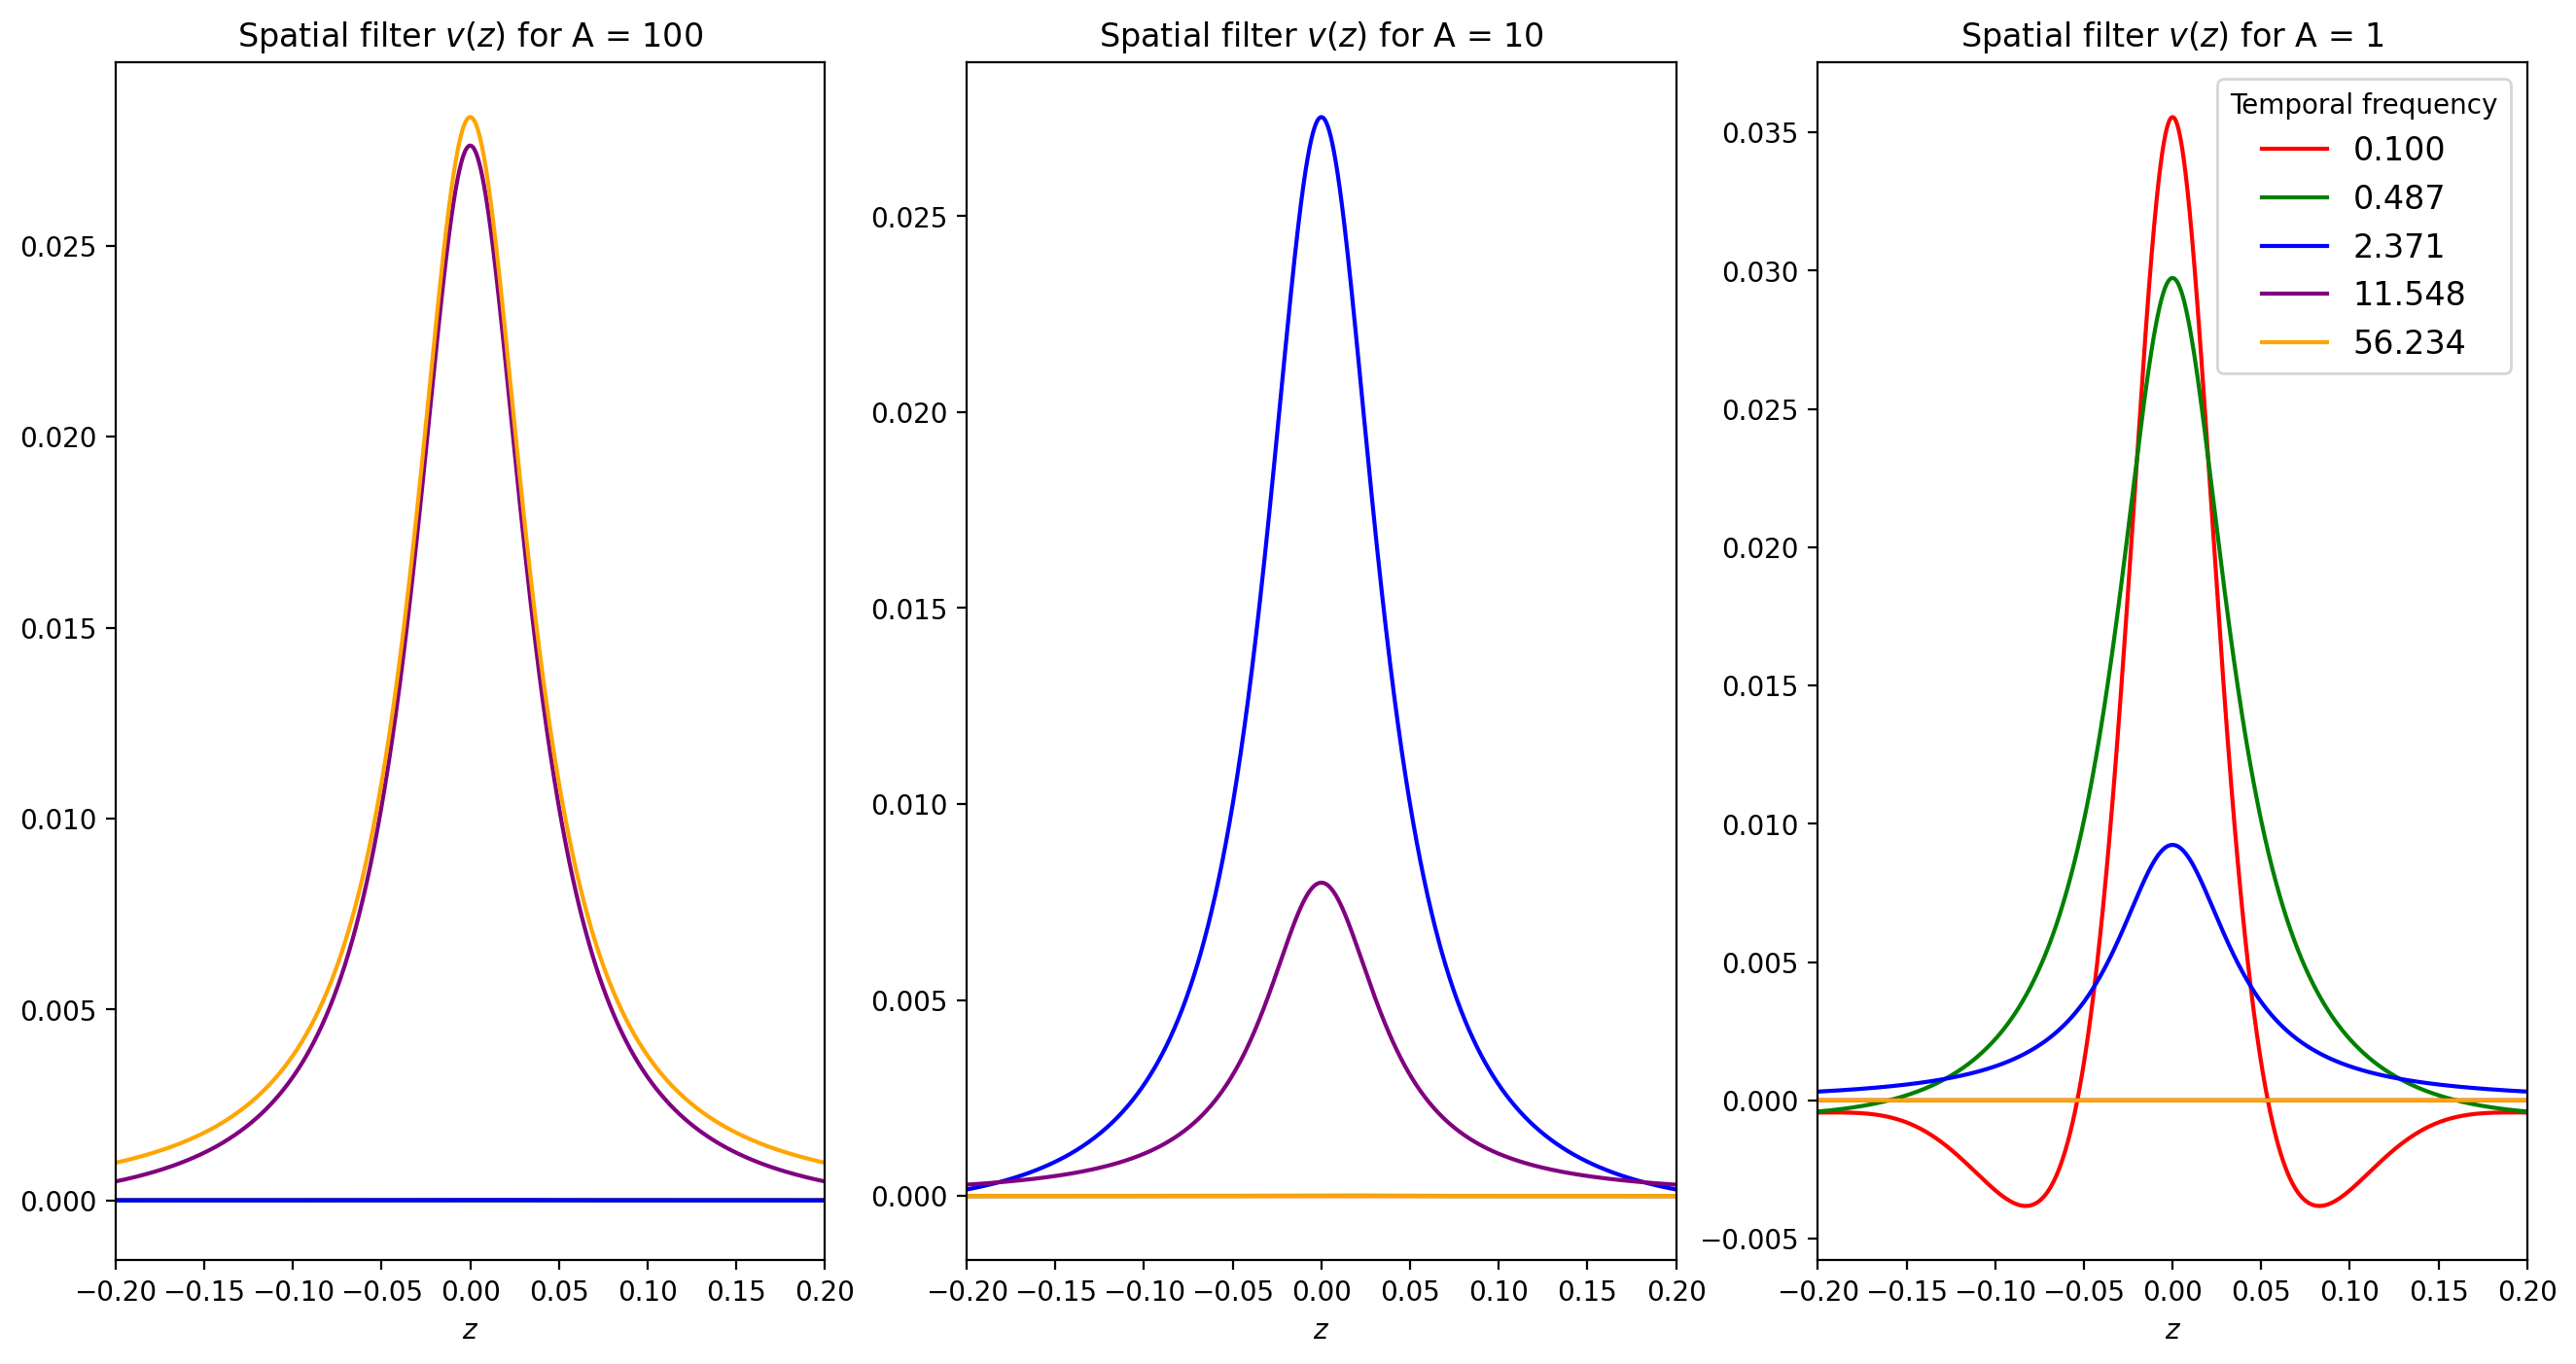

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
omega_range_mul = 4
k0_list = [10**k0 for k0 in np.linspace(2.25*k_range_mul, -1*k_range_mul, 5)]
o0_list = [10**o0 for o0 in np.linspace(-0.25*omega_range_mul, 1.75, 5)]

kf_list_noA = [(sigin**2/o0**2)**(1/alpha) for o0 in o0_list]
of_list_noA = [np.sqrt(sigin**2/k0**alpha) for k0 in k0_list]


P = 1
dz = 1e-4
N = 1000001
freqs_k = scipy.fft.fftshift(scipy.fft.fftfreq(N, d=dz) * 2 * np.pi)
L = (N//2) * dz
zz = np.linspace(-L/2, L/2, N)

# make a double exponential smoothing filter
fz = np.arange(-.2, .2, dz)
ff = np.exp(-50 * np.abs(fz))
ff /= np.sum(ff)

#This code is unoptimized. I run 3x as many optimal_logeps as I need to. 
colors = ['red', 'green', 'blue', 'purple', 'orange']
c = 0
lines = []
for kf_noA in kf_list_noA:
    log_eps = optimal_logeps(kf_noA, freqs_k, None, alpha, P, 'kf')
    print(log_eps)
    vspace_all = []
    for i in range(A.shape[0]):
        kf = kf_noA*(A[i]**(1/alpha))
        vv = filter_k(kf, 10**log_eps[i])(freqs_k)
        vf = np.convolve(vv[N//2:], ff, mode='same')
        vvf = pad_and_reflect(vf, N)
        vspace = np.real(scipy.fft.fftshift(scipy.fft.fft(scipy.fft.ifftshift(vvf))))
        if np.mean(vspace) == 0:
            print("Zero vspace for kf: ", kf_noA)
        #vspace /= np.linalg.norm(vspace)
        vspace_all.append(vspace)
    vspace_all = np.array(vspace_all)
    vspace_all /= np.linalg.norm(vspace_all)
    for i in range(A.shape[0]):
        line, = ax[i].plot(zz, vspace_all[i,:], color = colors[c], label = str(('{:.3f}').format(o0_list[c])))
        ax[i].set_xlim(-0.2, 0.2)   
        #ax[i].set_yticks([])
        ax[i].set_xlabel(r"$z$")
        ax[i].set_title(r"Spatial filter $v(z)$ for A = " + str(A[i]));
    lines.append(line)
    c += 1    
ax[i].legend(handles=lines, title = "Temporal frequency", fontsize = 12)
    #ax[0].text(*label_loc, r'\textbf{B}', transform=ax[0].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    #cbar = fig.colorbar(s)
    #cbar.ax.tick_params(labelsize=50)
plt.show()

In [25]:
freqs_k.shape

(1000001,)

Excess power:  -8.141982865694786e-09
log_eps:  [-1.36055383 -1.56065216 -1.68151206]


/tmp/ipykernel_761807/471616026.py:66: RuntimeWarning: divide by zero encountered in log
  extrap_fun = interp1d(range(0, len(filter)), np.maximum(-32, np.log(filter)), fill_value='extrapolate')


Excess power:  -8.025424547142279e-09
log_eps:  [-0.63327041 -0.90460451 -1.15504771]
Excess power:  -2.580158309228864e-13
log_eps:  [ 1.92710392e-01 -4.91933308e-04 -8.61701835e-01]
Excess power:  -4.2787995369053533e-13
log_eps:  [ 0.13406944 -0.01761852 -0.3446948 ]
Excess power:  -3.087075040042464e-10
log_eps:  [ 0.0805309   0.07237286 -0.11092124]


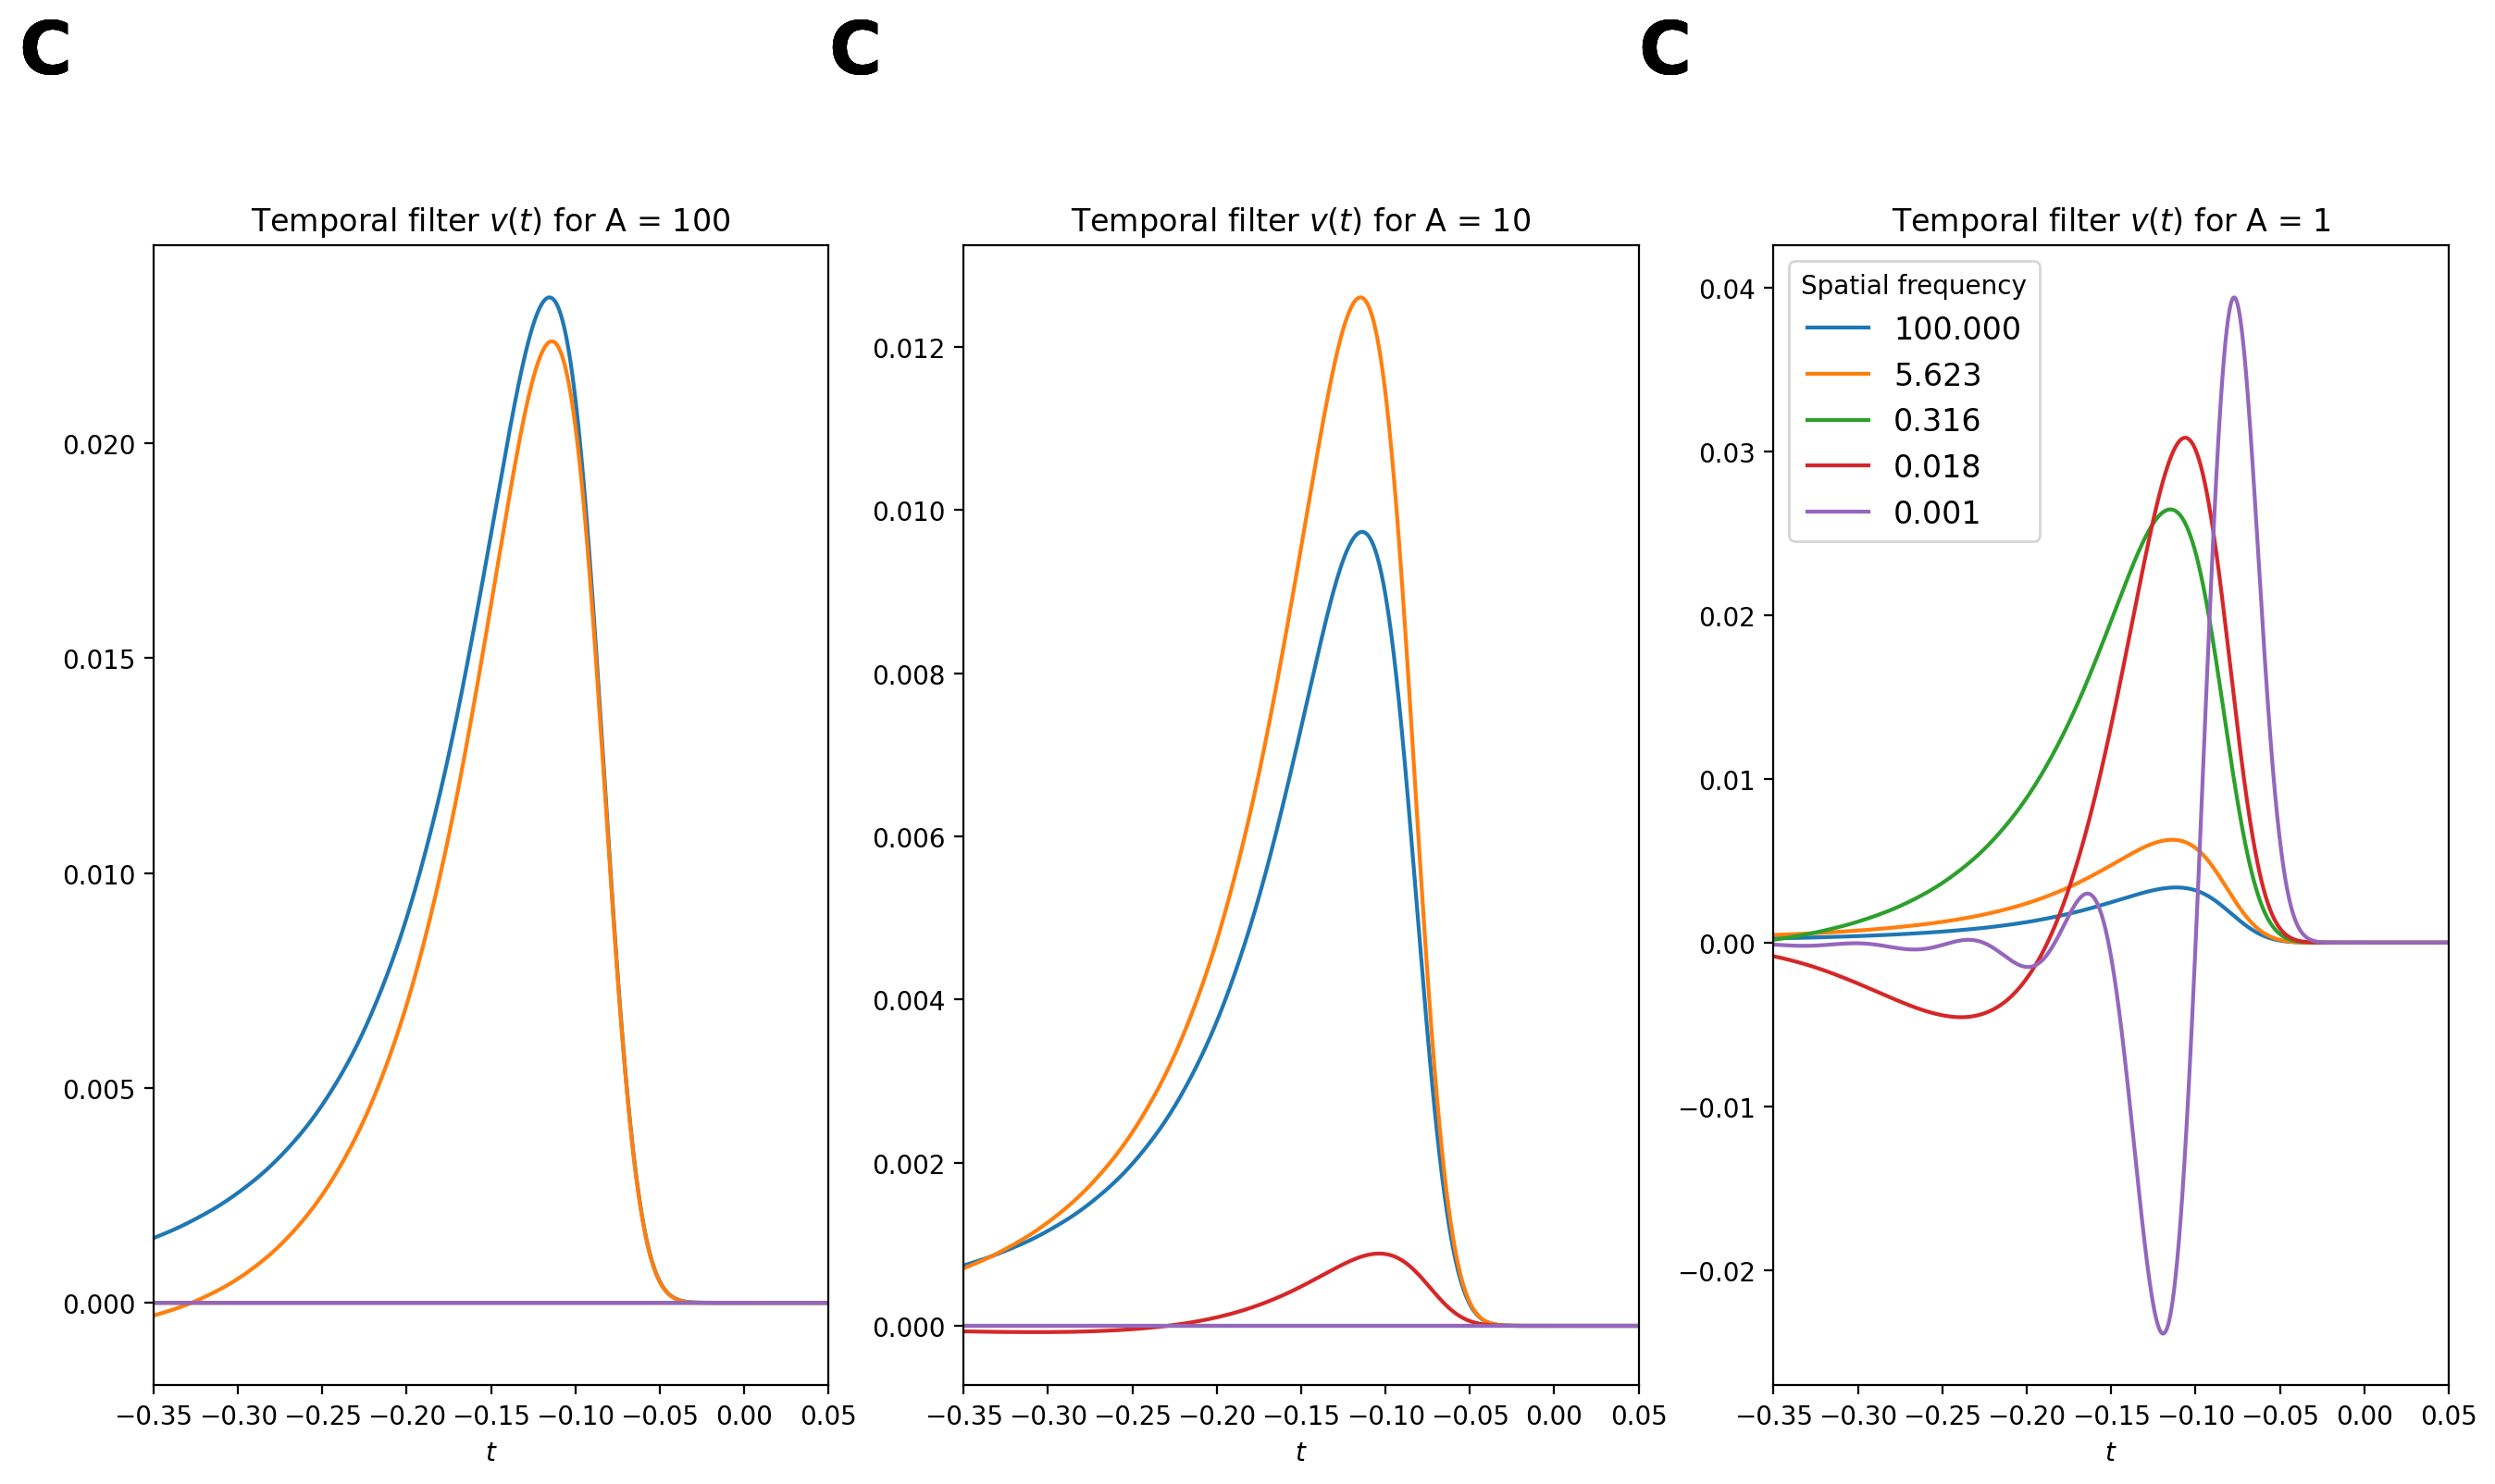

In [47]:
k0_list = [10**k0 for k0 in np.linspace(2, -3, 5)]
o0_list = [10**o0 for o0 in np.linspace(-0.25, 1.75, 5)] #original is -0.25 to 1.75

kf_list_noA = [(sigin**2/o0**2)**(1/alpha) for o0 in o0_list]
of_list_noA = [np.sqrt(sigin**2/k0**alpha) for k0 in k0_list]

A = np.array([100,10,1])
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
dt = 1e-4
M = 1000001
#M = 10000001
freqs_o = scipy.fft.fftshift(scipy.fft.fftfreq(M, d=dt) * 2 * np.pi)
T = (M//2) * dt
tt = np.linspace(-T/2, T/2, M)
vt_all = []
vv_all = []
log_eps_all = []
c = 0
lines = []
for of_noA in of_list_noA:
    log_eps = optimal_logeps(of_noA, freqs_o, None, 2, P, 'of')
    log_eps_all.append(log_eps)
    print("log_eps: ", log_eps)
    vts = []
    for i in range(A.shape[0]):
        vv = filter_k(of_noA*np.sqrt(A[i]), 10**log_eps[i], power=2)(freqs_o)
        #Prevents artifacts when output filter is 0 for all freqs. 
        vf = np.convolve(vv[M//2:], ff, mode='same')
        log_v = extrap_and_reflect(vf, M, return_log=True)
        log_v_a = np.conj(ssig.hilbert(log_v))
        vt = np.real(scipy.fft.fftshift(scipy.fft.fft(scipy.fft.ifftshift(np.exp(log_v_a)))))
        vv_all.append(vv)
        vt_all.append(vt)
        vts.append(vt)
    vts = np.array(vts)
    vts /= np.linalg.norm(vts)
    for i in range(A.shape[0]):
        line, = ax[i].plot(tt, vts[i,:], label = str(('{:.3f}').format(k0_list[c])))
        if i == 0:
            lines.append(line)
        ax[i].set_xlim(-0.35, 0.05)
        ax[i].set_xlabel(r"$t$")
        #ax[i].set_yticks([])
        ax[i].set_title(r"Temporal filter $v(t)$ for A = " + str(A[i]));
        ax[i].text(*label_loc, "C", transform=ax[i].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    c += 1
ax[i].legend(handles=lines, title = "Spatial frequency", fontsize = 12)
plt.show()

In [38]:
plt.show()

/tmp/ipykernel_237771/471616026.py:66: RuntimeWarning: divide by zero encountered in log
  extrap_fun = interp1d(range(0, len(filter)), np.maximum(-32, np.log(filter)), fill_value='extrapolate')


False

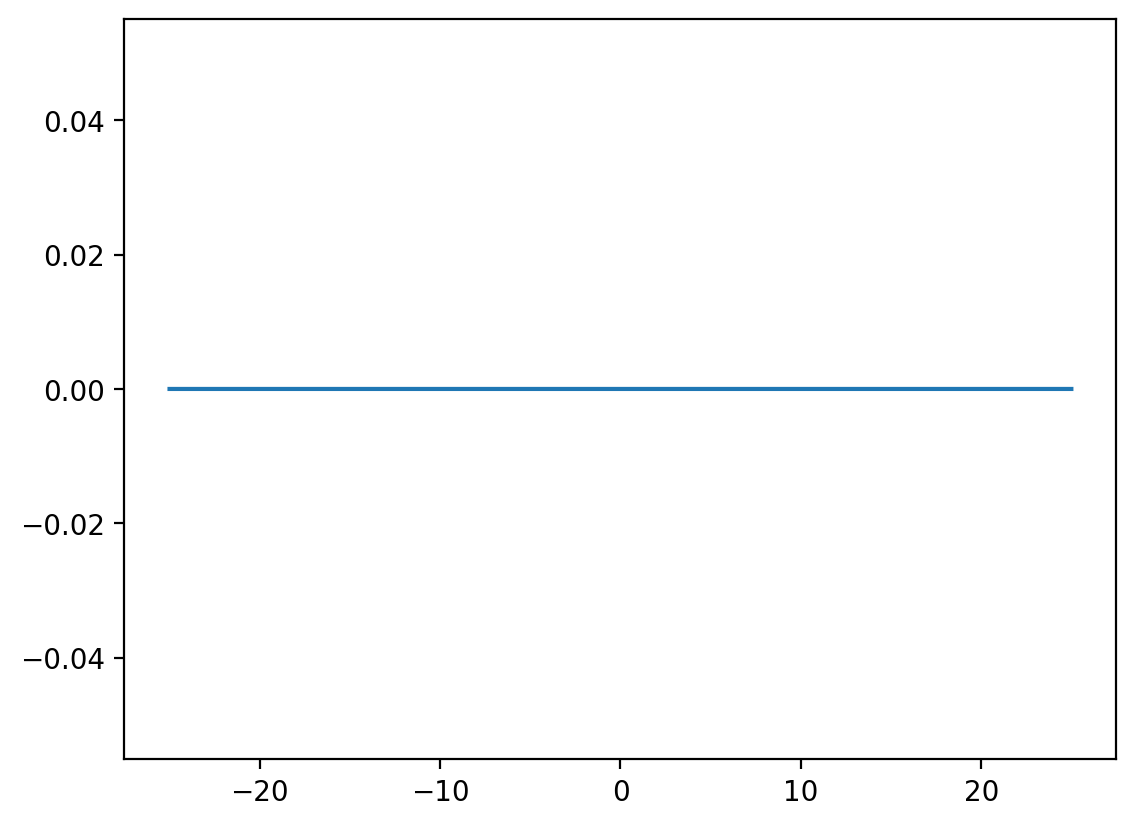

In [349]:
#This snippet is for debugging purposes 

M = 1000001
T = (M//2) * dt
tt = np.linspace(-T/2, T/2, M)
vv = vv_all[2]
vf = np.convolve(vv[M//2:], ff, mode='same')
log_v = extrap_and_reflect(vf, M, return_log=True)
log_v_a = np.conj(ssig.hilbert(log_v))
vt_prenorm = np.real(scipy.fft.fftshift(scipy.fft.fft(scipy.fft.ifftshift(np.exp(log_v_a)))))
vt = vt_prenorm/np.linalg.norm(vt_prenorm)
#plt.plot(tt,  vv_all[2])
plt.plot(tt, vv)
np.max(vv) > 0
#plt.xlim(-0.35,0.05)

In [352]:
omega_range_mul

4

In [157]:
k0_list = [10**k0 for k0 in np.linspace(2.25, -1, 5)]
o0_list = [10**o0 for o0 in np.linspace(-0.25*omega_range_mul, 1.75, 5)]

kf_list_noA = [(sigin**2/o0**2)**(1/alpha) for o0 in o0_list]
of_list_noA = [np.sqrt(sigin**2/k0**alpha) for k0 in k0_list]
np.array(kf_list_noA)*(100**(1/alpha))
np.array(of_list_noA)*np.sqrt(100)

array([ 0.34474661,  1.16312128,  3.92418976, 13.23960414, 44.66835922])

In [188]:
omega_range_mul

4

In [ ]:
cmap = sns.color_palette('rocket')
kf = 50

J_list = [1, 4, 9, 16, 25]
for idx, J in enumerate(J_list):
    k_lims = (0, np.sqrt(J) * 8)
    log_eps = optimal_logeps(kf, freqs_k, k_lims, alpha, P)
    vv = filter_k(kf, 10**log_eps, k_lims)(freqs_k)
    vf = np.convolve(vv[N//2:], ff, mode='same')
    vvf = pad_and_reflect(vf, N)
    vspace = np.real(scipy.fft.fftshift(scipy.fft.fft(scipy.fft.ifftshift(vvf))))
    vspace /= np.linalg.norm(vspace)    
    ax[1, 0].plot(zz, vspace, color=cmap[idx], label=J)

ax[1, 0].set_xlim(-0.2, 0.2)
ax[1, 0].set_yticks([])
ax[1, 0].set_xlabel(r"$z$")
ax[1, 0].set_title(r"Spatial filter $v(z)$")
ax[1, 0].legend(title="Neurons", loc='upper right')
ax[1, 0].text(*label_loc, r'\textbf{D}', transform=ax[1, 0].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')



for idx in range(len(diff_info_fn_list)):
    all_diff_info = diff_info_fn_list[idx]
    ax[1, 1].plot(all_J_list, all_diff_info(all_J_list))

ax[1, 1].set_title("Marginal information gain per neuron")
ax[1, 1].set_xlabel("Number of neurons in mosaic")
ax[1, 1].set_ylabel("Information gain (nats)")
ax[1, 1].text(*label_loc, r'\textbf{E}', transform=ax[1, 1].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')
    

Excess power:  -1.7180000044803023e-07
[ 0.34820823 -0.00302869 -0.49629691]


/tmp/ipykernel_237771/3867812646.py:48: RuntimeWarning: invalid value encountered in divide
  vspace /= np.linalg.norm(vspace)


(1000001,) (1000001,)
Excess power:  -9.7757264061471e-07
[-1.16016489e-03 -9.26053616e-01 -1.18579582e+00]
(1000001,) (1000001,)
Excess power:  -1.0263746608174529e-07
[-1.50309244 -0.38950636 -1.41164287]
(1000001,) (1000001,)
Excess power:  0.9834975803101909
[-2. -2. -2.]
(1000001,) (1000001,)
Excess power:  1.0
[-2. -2. -2.]
(1000001,) (1000001,)
Excess power:  -1.7180000044803023e-07
[ 0.34820823 -0.00302869 -0.49629691]
(1000001,) (1000001,)
Excess power:  -9.7757264061471e-07
[-1.16016489e-03 -9.26053616e-01 -1.18579582e+00]
(1000001,) (1000001,)
Excess power:  -1.0263746608174529e-07
[-1.50309244 -0.38950636 -1.41164287]
(1000001,) (1000001,)
Excess power:  0.9834975803101909
[-2. -2. -2.]
(1000001,) (1000001,)
Excess power:  1.0
[-2. -2. -2.]
(1000001,) (1000001,)
Excess power:  -1.7180000044803023e-07
[ 0.34820823 -0.00302869 -0.49629691]
(1000001,) (1000001,)
Excess power:  -9.7757264061471e-07
[-1.16016489e-03 -9.26053616e-01 -1.18579582e+00]
(1000001,) (1000001,)
Excess p

NameError: name 'of_list' is not defined

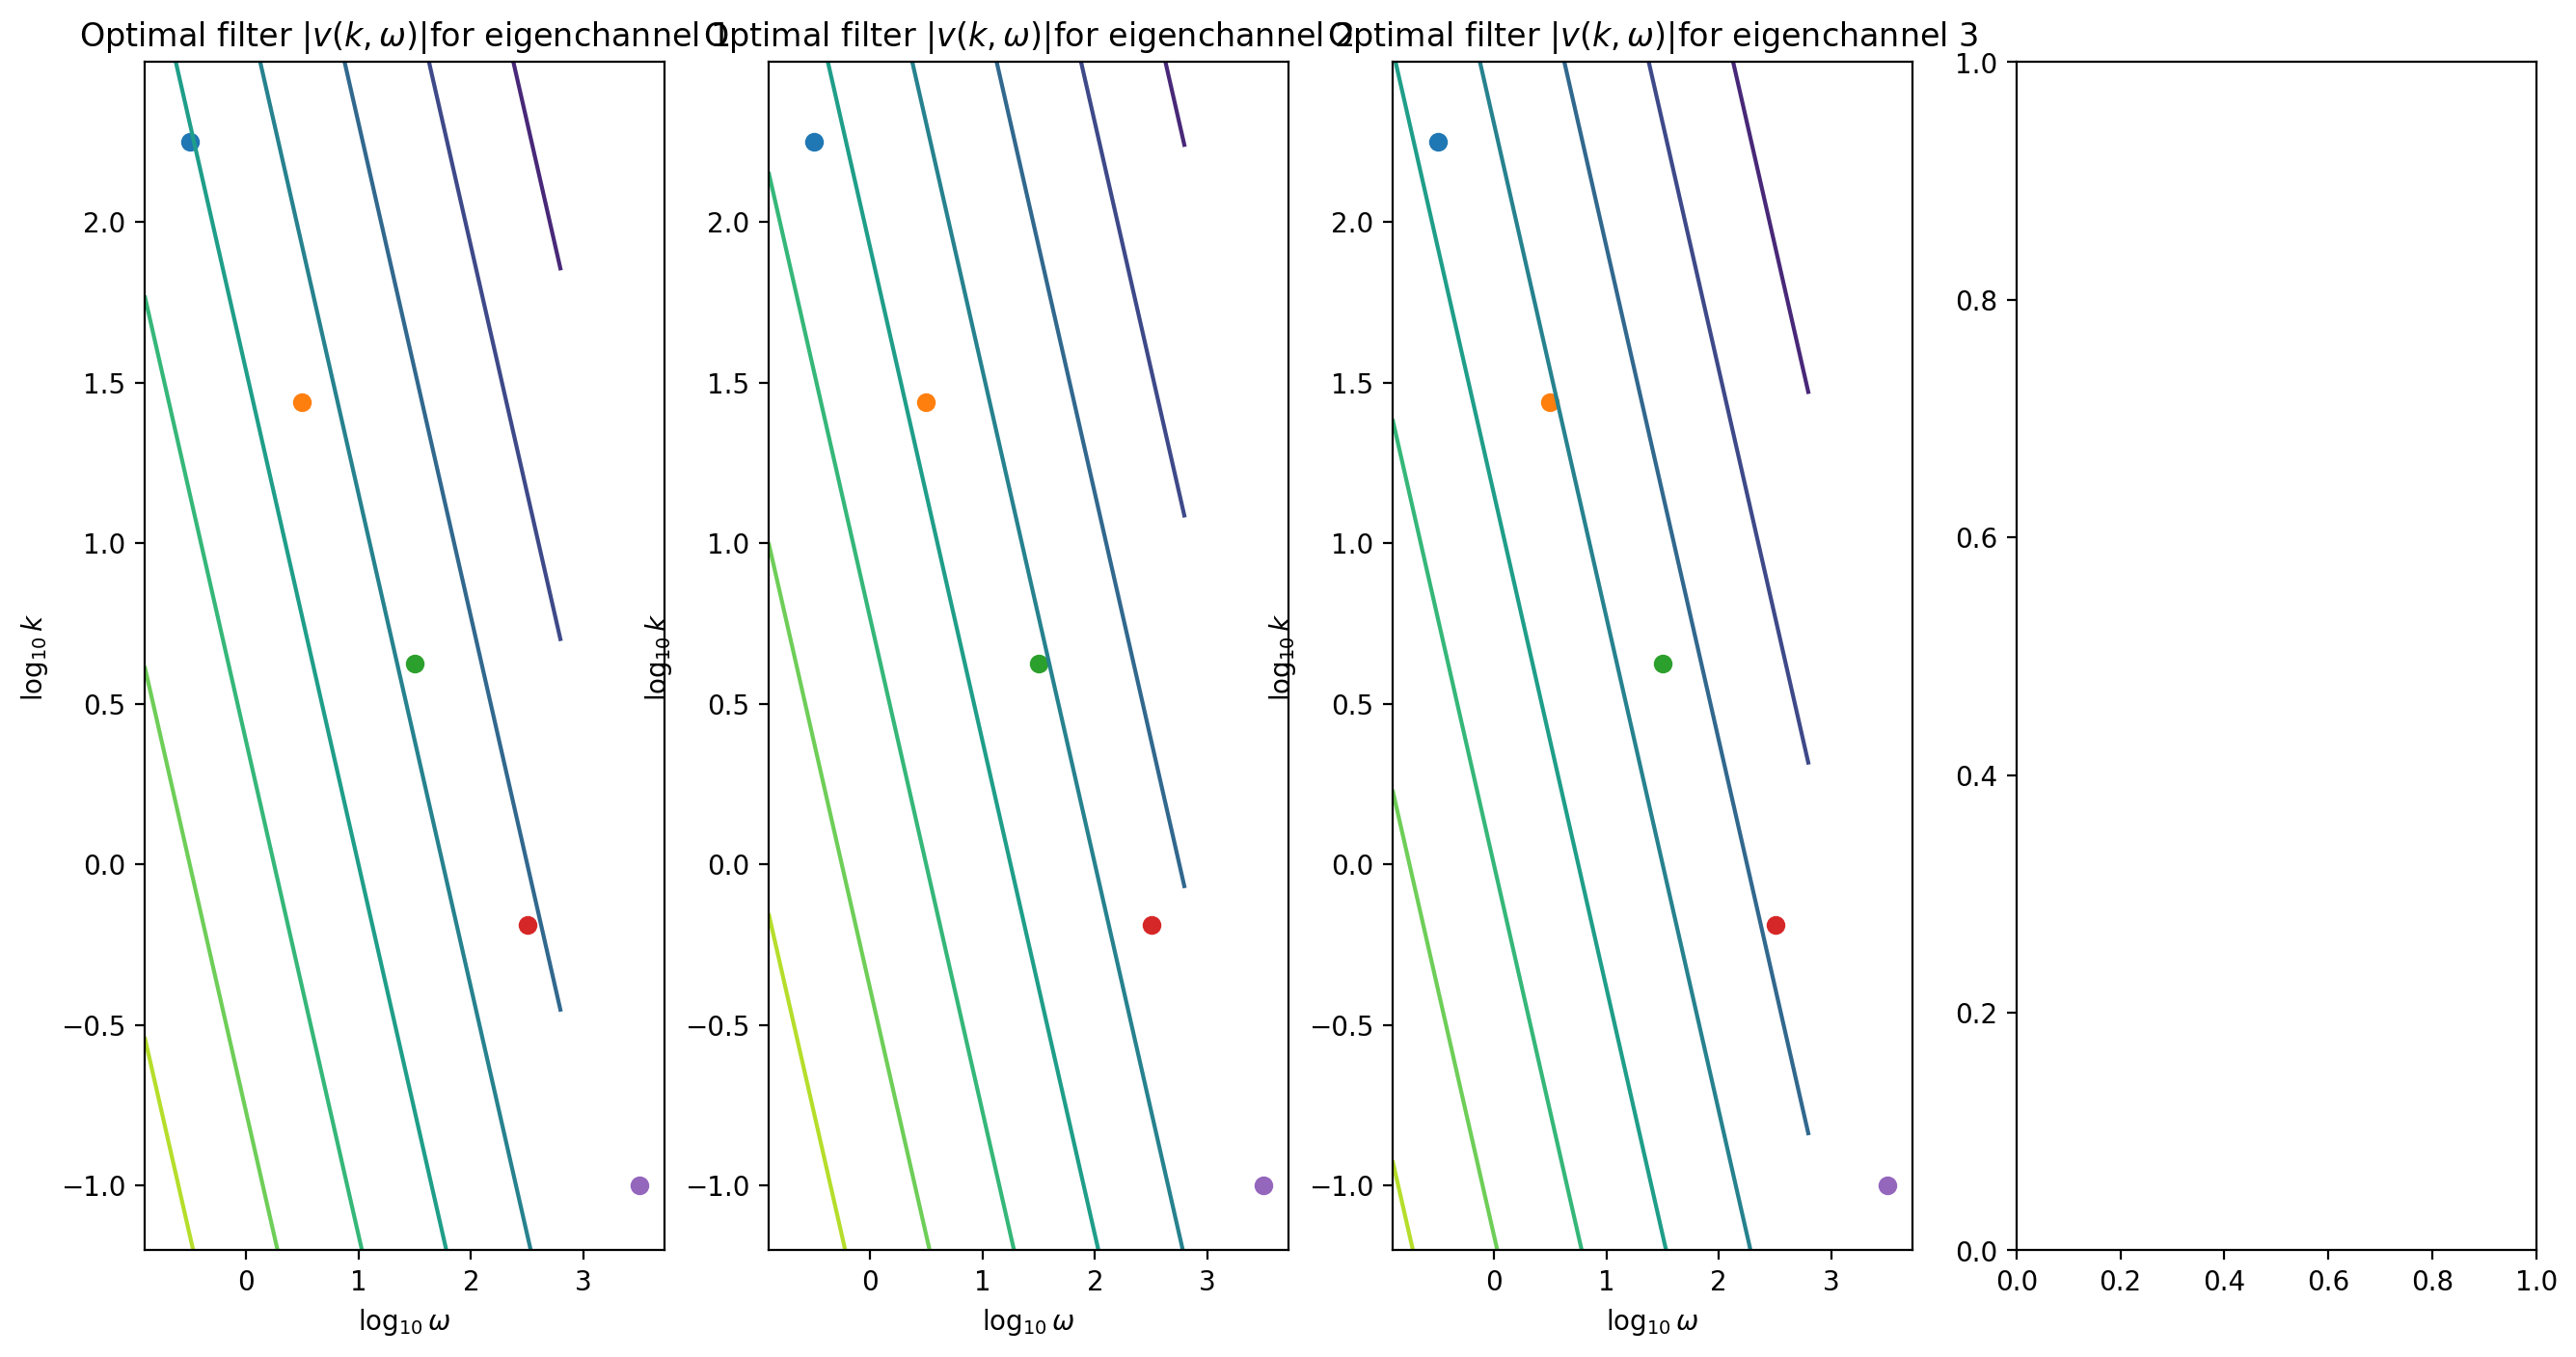

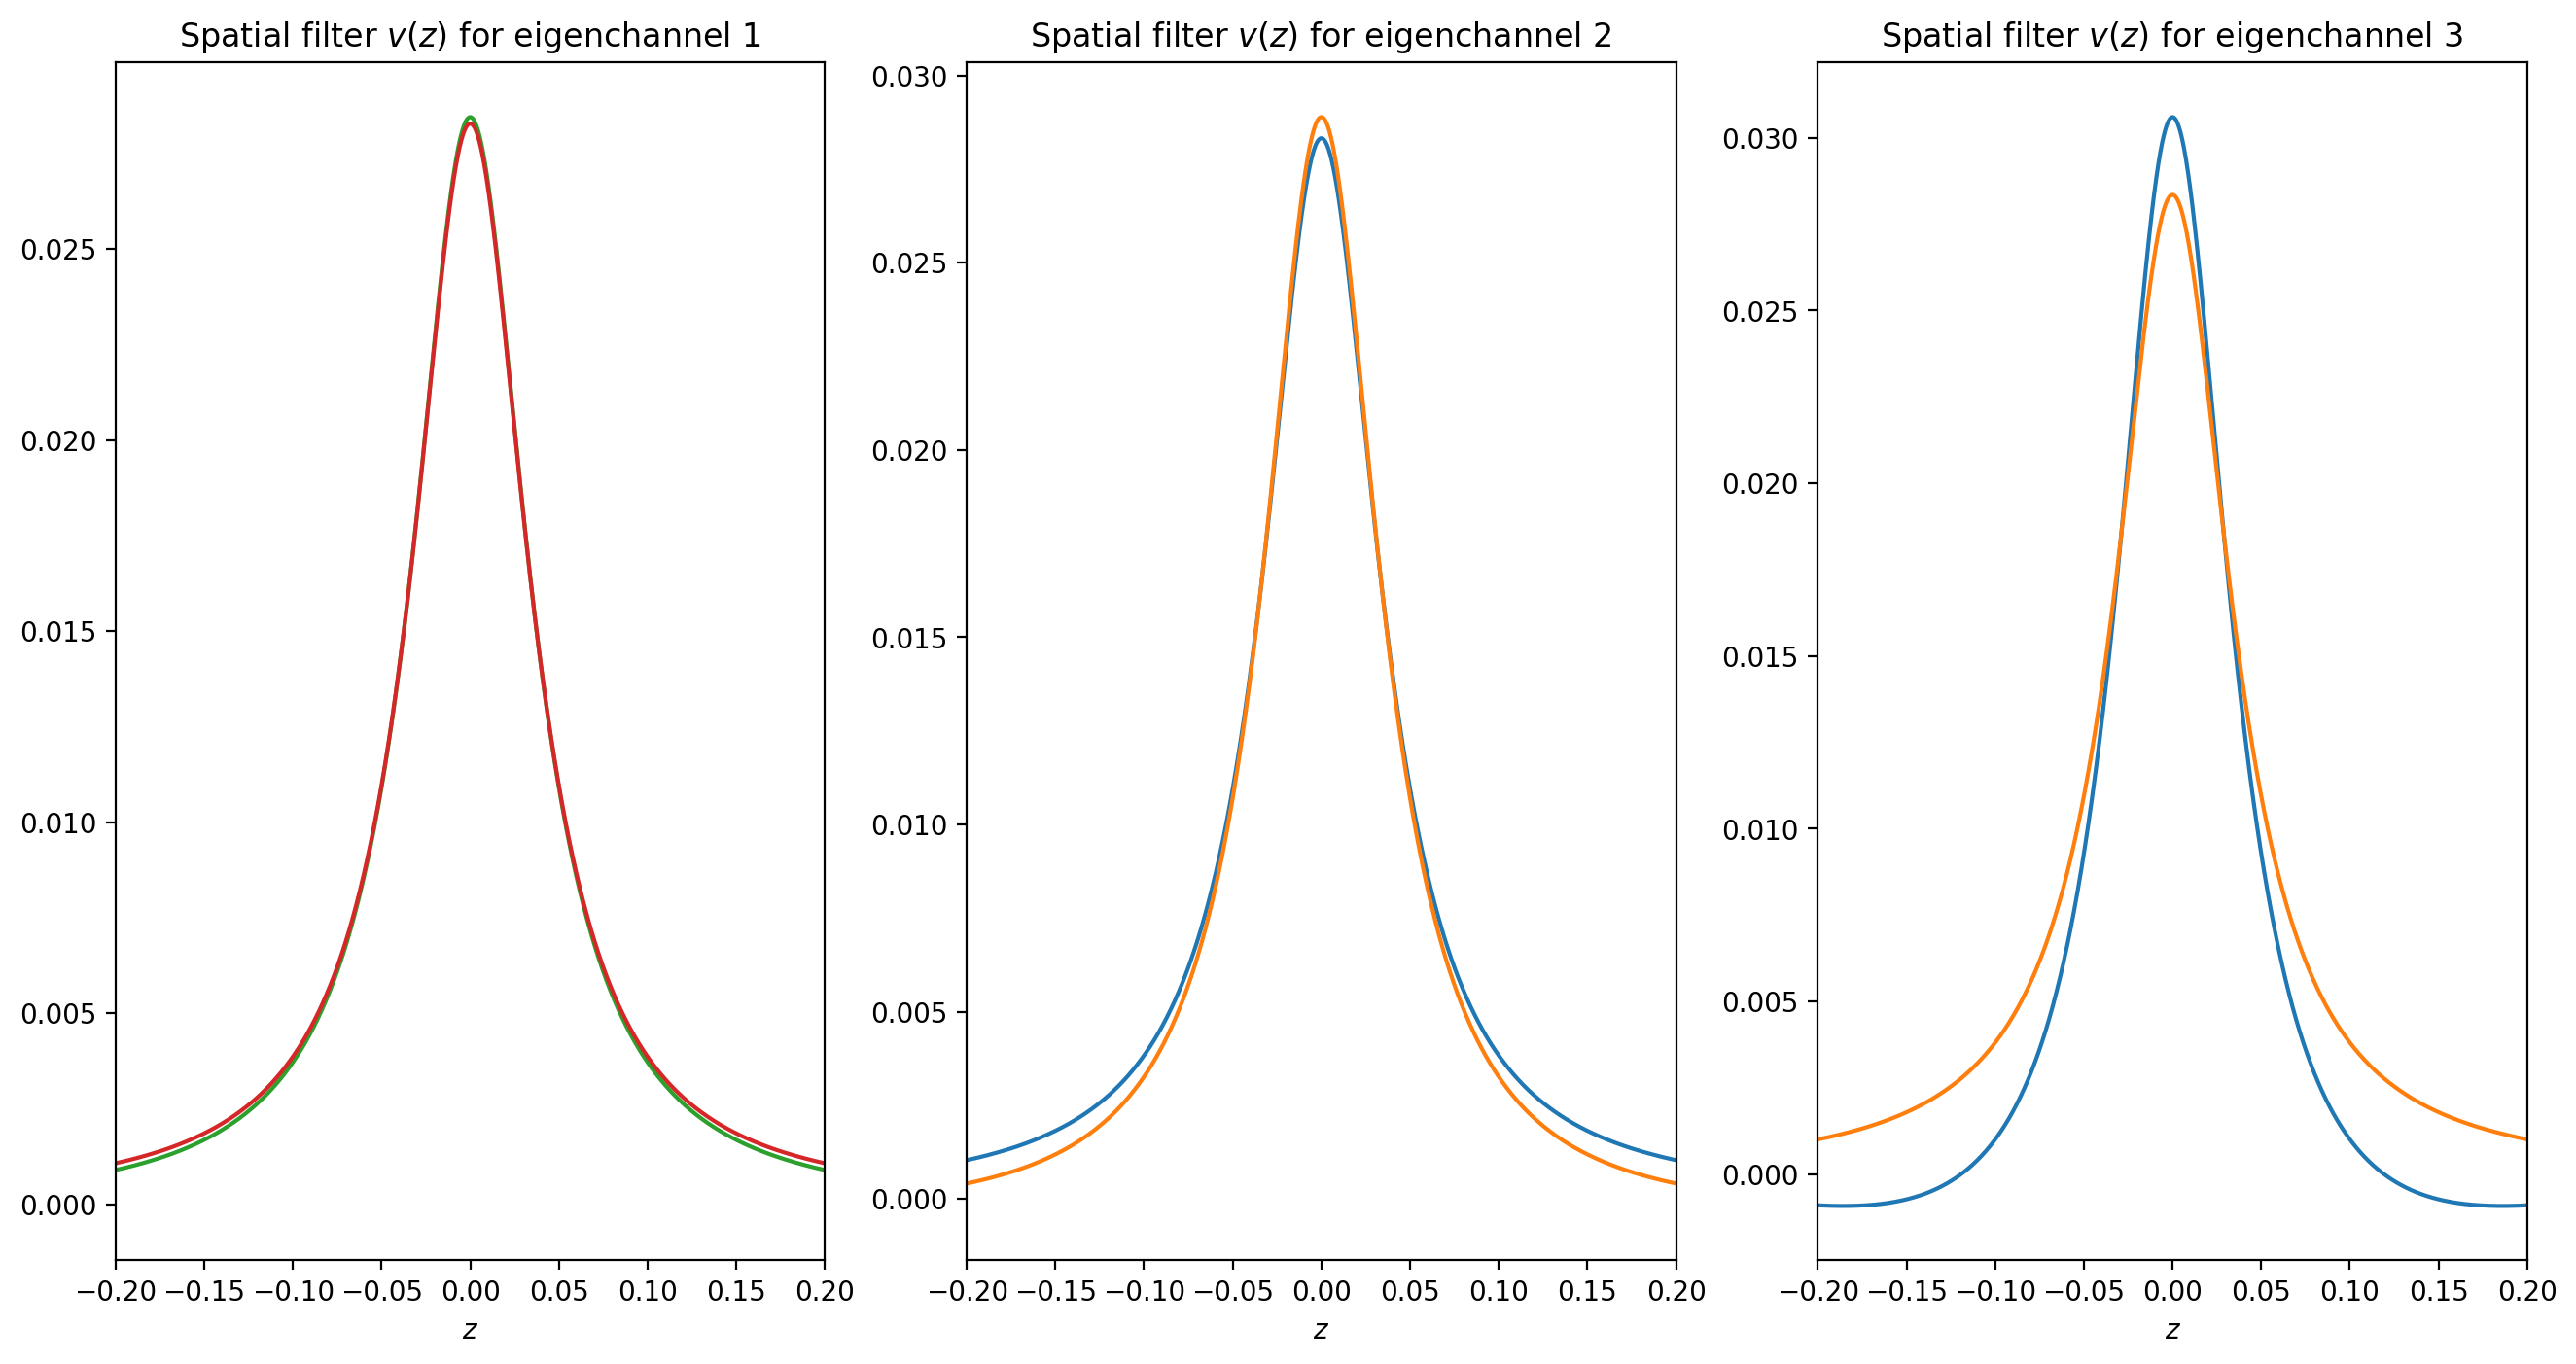

In [114]:

ax[1, 2].plot(all_J_list, np.cumsum(marginal_allocation, axis=0))
ax[1, 2].set_ylim(0, 50)
ax[1, 2].set_title("Neuron allocation across mosaics")
ax[1, 2].set_xlabel("Total number of neurons")
ax[1, 2].set_ylabel("Neurons in mosaic")
ax[1, 2].text(*label_loc, r'\textbf{F}', transform=ax[1, 2].transAxes, fontsize=fontsize, fontweight=fontweight, va='top')

plt.tight_layout()
plt.savefig("figures/optimal_linear_spacetime.pdf")

In [99]:
kf_noA*(A[0]**(1/alpha))

0.07017038286703829

In [113]:
vspace

array([nan, nan, nan, ..., nan, nan, nan])